In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
pd.set_option('mode.chained_assignment',  None)
#df overwrite warning off

In [3]:
mpl.rc('font',family = "Malgun Gothic")

In [4]:
df1_1=pd.read_excel('./data/1.1 고객기본정보(개인정보 제외)_추출.xlsx')

In [5]:
df2_1=pd.read_excel('./data/2.1 상품정보_추출.xlsx')

In [6]:
df3_1=pd.read_excel('./data/3.1 주문정보(개인정보 제외)_추출.xlsx')

# 매출 증감 추이
- 큰 그림을 보기 위한 전반적인 분석 1

In [7]:
#시간의 흐름에 따른 매출변화 확인
df3_1.head(1)

,주문번호,순번,주문일시,진행구분,배송지,상품번호,상품명,옵션명,수량,판매가,배송비,쿠폰할인액,회원주문여부,회원번호
0,1711080845542139,1,2017-11-08 08:46:26,환불완료,서울 영등포구 국제금융로2길 32,G1710311847_6746,(임직원 전용)[케라미카] 바뎀 2인홈세트 (11p),NaN,1,48840.0,0.0,9760.0,Y,1876


## 매출 전처리
위에 넣기

In [50]:
df_sales = df3_1[['상품번호','회원번호','주문번호','주문일시','수량','판매가','배송비','쿠폰할인액','진행구분']]

In [51]:
#주문이 취소, 환불된 경우는 제거해야 함.
print(df_sales['진행구분'].unique())

['환불완료' '결제취소' '주문취소' '구매확정' '교환완료' '배송준비중' '환불신청' '배송완료' '배송중' '결제완료'
 '교환신청' '주문완료']


In [52]:
df_sales = df_sales[df_sales.진행구분 == '구매확정']

In [202]:
#'매출' 컬럼 추가
df_sales['매출'] = df_sales.판매가-df_sales.쿠폰할인액
df_sales.head(1)

,상품번호,회원번호,주문번호,주문일시,수량,판매가,배송비,쿠폰할인액,진행구분,매출
12,G1709201602_1482,1972,1711091120092237,2017-11-09 11:23:07,5,16000.0,2500.0,0.0,구매확정,16000.0


In [201]:
df_sales.매출.count() #총 판매량

19161

In [203]:
df_sales.매출.sum() #총 매출액

1402978678.0

In [54]:
df_sales.dtypes #주문일시가 object이므로 전환필요

상품번호      object
회원번호       int64
주문번호       int64
주문일시      object
수량         int64
판매가      float64
배송비      float64
쿠폰할인액    float64
진행구분      object
매출       float64
dtype: object

In [55]:
df_sales['주문일시'] = pd.to_datetime(df3_1.주문일시)
df_sales.dtypes

상품번호             object
회원번호              int64
주문번호              int64
주문일시     datetime64[ns]
수량                int64
판매가             float64
배송비             float64
쿠폰할인액           float64
진행구분             object
매출              float64
dtype: object

## 매출 증감 시각화

<AxesSubplot:xlabel='주문일시', ylabel='매출'>

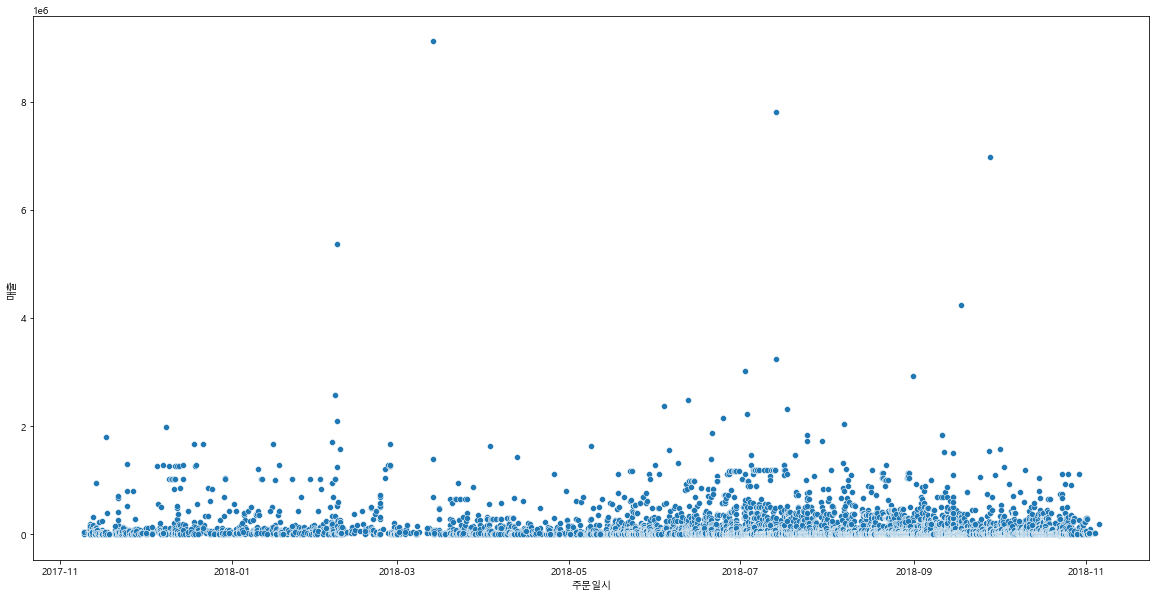

In [56]:
plt.figure(figsize=[20,10])
sns.scatterplot(data=df_sales, x='주문일시', y='매출') #특정 매출액이 너무 높아서 유의미한 관측이 불가능

In [57]:
#경향을 보다 자세히 보기위해 유난히 높은 매출을 제거하고 확인
df_salescopy=df_sales.copy()
df_salescopy.loc[df_sales['매출'] > 4000000]

,상품번호,회원번호,주문번호,주문일시,수량,판매가,배송비,쿠폰할인액,진행구분,매출
1370,G1801171545_5829,2662,1802071115548790,2018-02-07 13:07:34,79,5372000.0,0.0,0.0,구매확정,5372000.0
2046,G1803021141_7900,2095,1803131857440142,2018-03-13 19:00:04,19,9120000.0,0.0,0.0,구매확정,9120000.0
8234,G1807111553_1096,2052,1807131733023812,2018-07-13 17:37:25,1100,7810000.0,0.0,0.0,구매확정,7810000.0
17399,G1809141101_3221,2041,1809170935588837,2018-09-17 09:37:09,139,4232550.0,0.0,0.0,구매확정,4232550.0
18470,G1809271348_5574,48571,1809271825431852,2018-09-27 18:27:36,1,6985500.0,0.0,0.0,구매확정,6985500.0


In [58]:
df_salescopy.drop([1370,2046,8234,17399,18470], inplace=True)
df_salescopy.loc[df_sales['매출'] > 4000000]

,상품번호,회원번호,주문번호,주문일시,수량,판매가,배송비,쿠폰할인액,진행구분,매출


<AxesSubplot:xlabel='주문일시', ylabel='매출'>

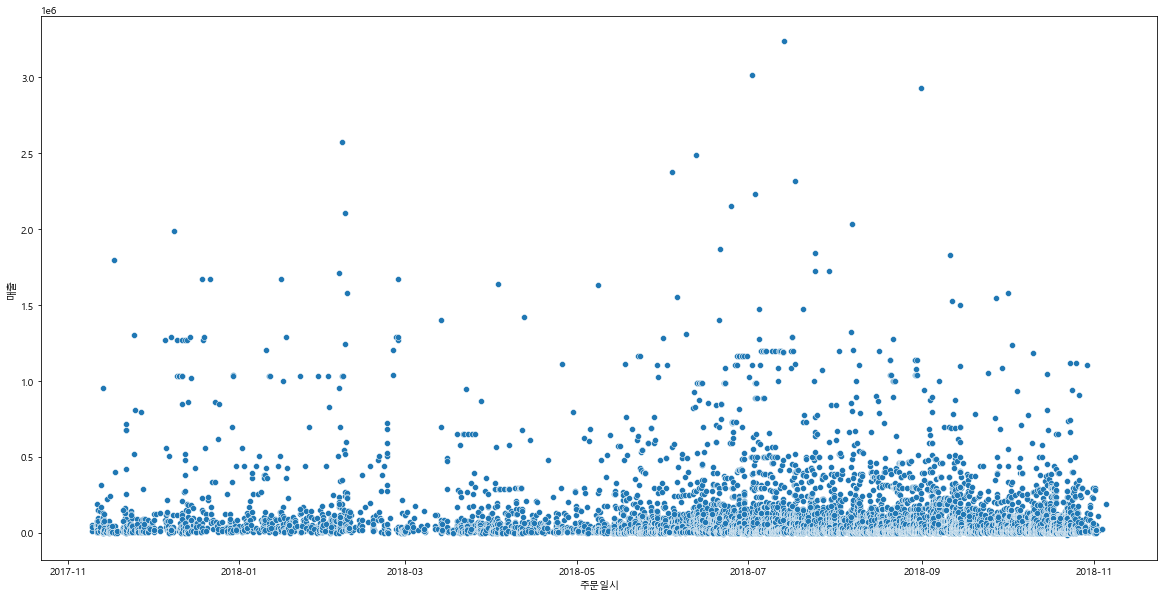

In [59]:
plt.figure(figsize=[20,10])
sns.scatterplot(data=df_salescopy, x = '주문일시', y = '매출')

In [60]:
#여전히 높기에 조금 더 제거했습니다.
df_salescopy.loc[df_salescopy['매출'] > 2000000]

,상품번호,회원번호,주문번호,주문일시,수량,판매가,배송비,쿠폰할인액,진행구분,매출
1347,G1801221358_6219,2226,1802061550418690,2018-02-06 15:53:17,27,2573100.0,0.0,0.0,구매확정,2573100.0
1377,G1801261029_7433,2359,1802071510328847,2018-02-07 15:11:21,52,2106000.0,0.0,0.0,구매확정,2106000.0
4926,G1805151744_2481,19961,1806032212143531,2018-06-03 22:17:24,1,2475740.0,0.0,100000.0,구매확정,2375740.0
5201,G1710261533_5507,0,1806121002544636,2018-06-12 10:06:28,1,2490000.0,0.0,0.0,구매확정,2490000.0
6228,G1805151612_2311,2143,1806242134057740,2018-06-24 21:39:41,1,2228030.0,0.0,75990.0,구매확정,2152040.0
7044,G1805181254_4869,3250,1807021317400682,2018-07-02 13:20:46,1,3116660.0,0.0,100000.0,구매확정,3016660.0
7506,G1806221048_6470,41997,1807030953320852,2018-07-03 10:00:53,1,2230000.0,0.0,0.0,구매확정,2230000.0
8232,G1807111554_1097,43497,1807131724453807,2018-07-13 17:45:50,450,3240000.0,0.0,0.0,구매확정,3240000.0
8741,G1807171511_5594,2432,1807171538594717,2018-07-17 15:45:23,1,2408140.0,0.0,87920.0,구매확정,2320220.0
11478,G1802131616_2336,2367,1808062144551939,2018-08-06 21:48:12,7,2035950.0,0.0,0.0,구매확정,2035950.0


In [61]:
df_salescopy.drop([1347,1377,4926,5201,6228,7044,7506,8232,8741,11478,14706], inplace=True)
df_salescopy.loc[df_salescopy['매출'] > 2000000]

,상품번호,회원번호,주문번호,주문일시,수량,판매가,배송비,쿠폰할인액,진행구분,매출


<AxesSubplot:xlabel='주문일시', ylabel='매출'>

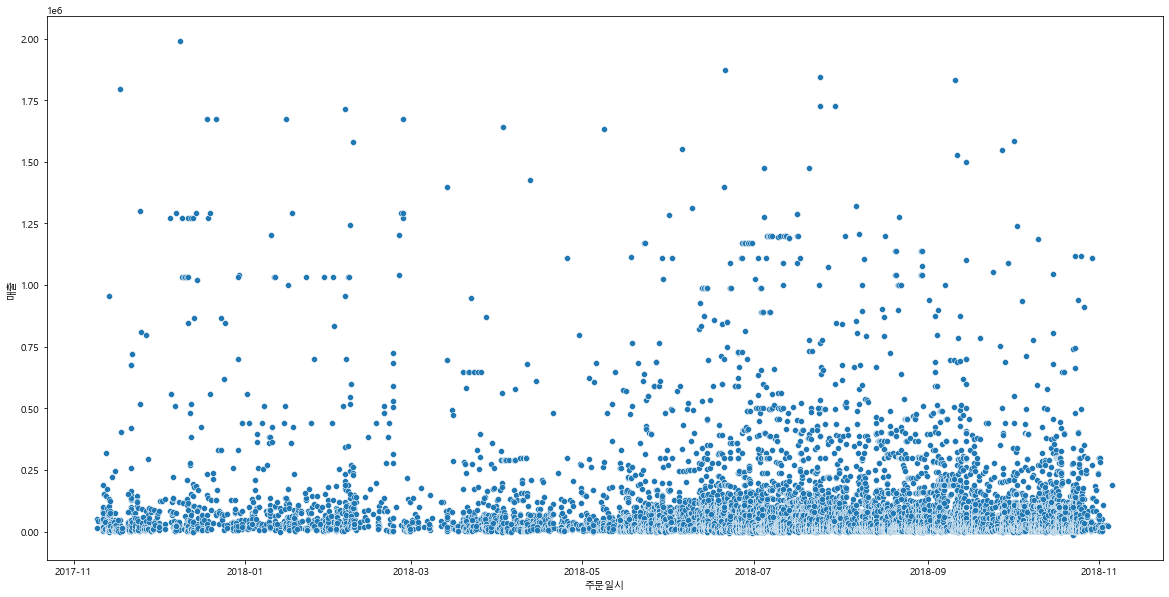

In [62]:
plt.figure(figsize=[20,10])
sns.scatterplot(data=df_salescopy, x = '주문일시', y = '매출')

In [63]:
#일별 / 월별로 매출을 구분할 필요 있음.
#구분을 위해 주문일시에서 시간을 제거
df_salescopy['주문일'] = df_salescopy['주문일시'].dt.date
df_salescopy.head(1)

,상품번호,회원번호,주문번호,주문일시,수량,판매가,배송비,쿠폰할인액,진행구분,매출,주문일
12,G1709201602_1482,1972,1711091120092237,2017-11-09 11:23:07,5,16000.0,2500.0,0.0,구매확정,16000.0,2017-11-09


In [64]:
df_salescopy.groupby('주문일')['매출'].sum()

주문일
2017-11-09     111900.0
2017-11-10      47520.0
2017-11-11    1764408.0
2017-11-12     849520.0
2017-11-13    2650050.0
                ...    
2018-11-01     841890.0
2018-11-02     203550.0
2018-11-03      25870.0
2018-11-04      23920.0
2018-11-05     189000.0
Name: 매출, Length: 357, dtype: float64

In [65]:
df_daily = df_salescopy.groupby('주문일')['매출'].sum().reset_index()
df_daily

,주문일,매출
0,2017-11-09,111900.0
1,2017-11-10,47520.0
2,2017-11-11,1764408.0
3,2017-11-12,849520.0
4,2017-11-13,2650050.0
...,...,...
352,2018-11-01,841890.0
353,2018-11-02,203550.0
354,2018-11-03,25870.0
355,2018-11-04,23920.0


<AxesSubplot:xlabel='주문일', ylabel='매출'>

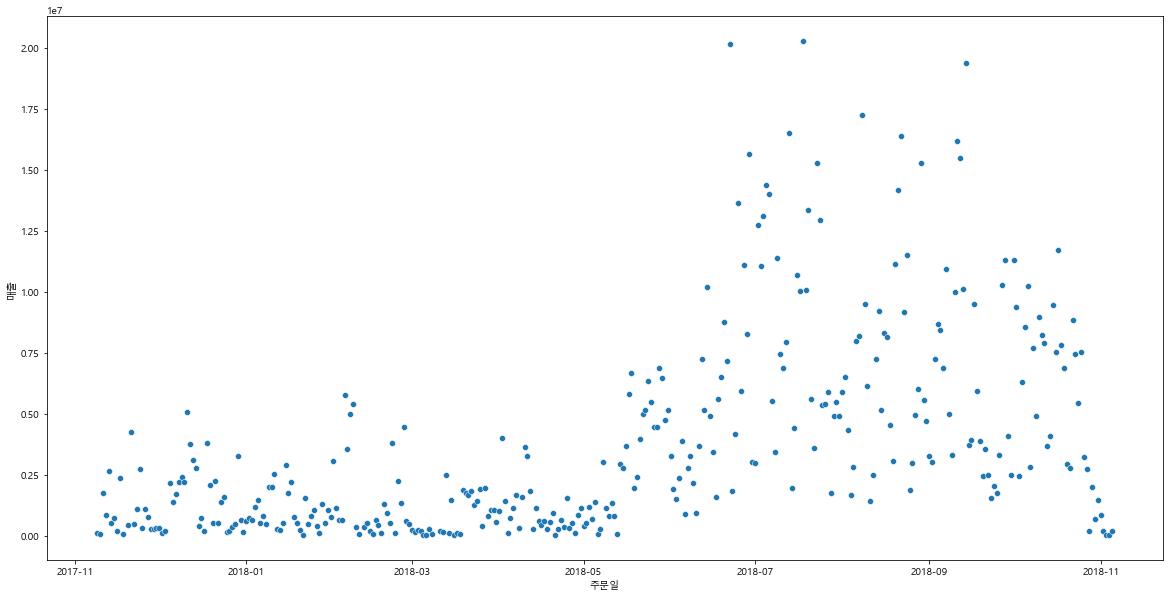

In [66]:
plt.figure(figsize=[20,10])
sns.scatterplot(data=df_daily, x = '주문일', y = '매출')

In [67]:
df_salescopy['주문월'] = df_salescopy['주문일시'].dt.to_period('M')
df_salescopy.head(1)

,상품번호,회원번호,주문번호,주문일시,수량,판매가,배송비,쿠폰할인액,진행구분,매출,주문일,주문월
12,G1709201602_1482,1972,1711091120092237,2017-11-09 11:23:07,5,16000.0,2500.0,0.0,구매확정,16000.0,2017-11-09,2017-11


In [68]:
df_monthly = df_salescopy.groupby('주문월')['매출'].sum().reset_index()
df_monthly

,주문월,매출
0,2017-11,21271708.0
1,2017-12,46013514.0
2,2018-01,30356337.0
3,2018-02,43624422.0
4,2018-03,23178730.0
5,2018-04,31203746.0
6,2018-05,95977605.0
7,2018-06,171007478.0
8,2018-07,269238029.0
9,2018-08,223611074.0


<AxesSubplot:xlabel='주문월', ylabel='매출'>

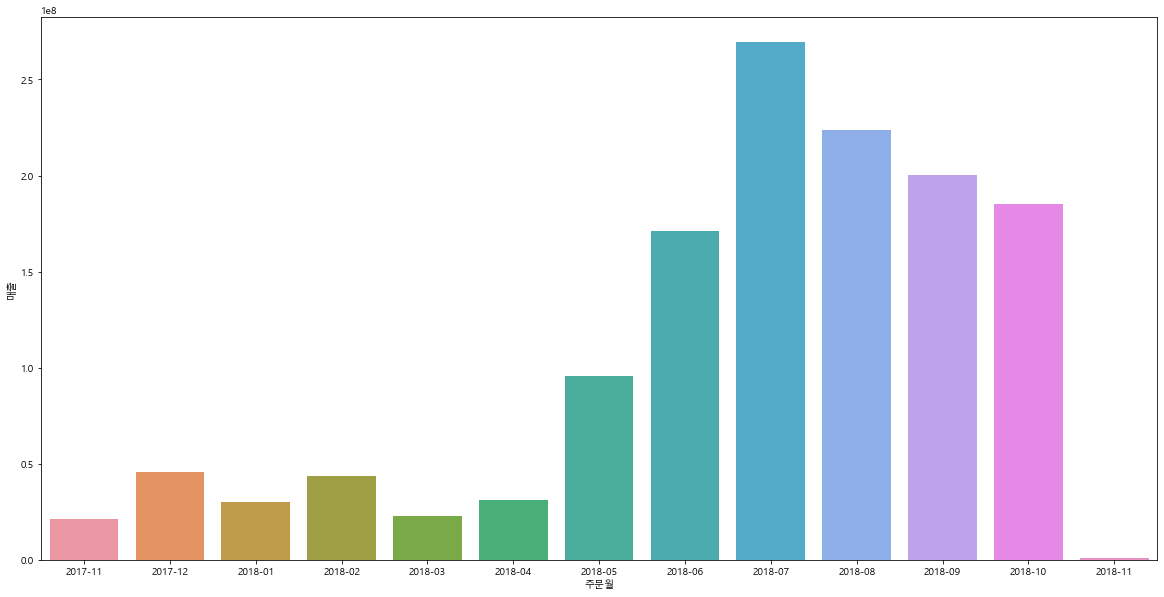

In [69]:
plt.figure(figsize=[20,10])
sns.barplot(data=df_monthly, x = '주문월', y = '매출')

# 회원수 증감 추이
- 큰 그림을 보기 위한 전반적인 분석 2

## 전처리

In [70]:
df1_1.dtypes #가입일이 object 형태인 것을 확인, datetime 데이터로 변경필요

회원번호                    int64
회원등급                   object
가입일                    object
최종방문일                  object
본인인증                   object
성별                     object
나이                     object
자주쓰는배송지 도로명            object
자주쓰는배송지 지번             object
signup         datetime64[ns]
dtype: object

In [71]:
df1_1[['가입일']].isnull().sum() #누락값은 없음

가입일    0
dtype: int64

In [72]:
df1_1[['가입일']].head()

,가입일
0,2016-11-05 00:00:00
1,2017-11-02 15:54:32
2,2017-11-02 15:55:11
3,2017-11-02 16:08:18
4,2017-11-02 16:10:06


In [73]:
df1_1['signup'] = pd.to_datetime(df1_1.가입일)
df1_1[['signup']].head()

,signup
0,2016-11-05 00:00:00
1,2017-11-02 15:54:32
2,2017-11-02 15:55:11
3,2017-11-02 16:08:18
4,2017-11-02 16:10:06


In [74]:
df1_1['signup'].dtypes #datetime으로 변경된 것을 확인

dtype('<M8[ns]')

## 회원수 증가 시각화

<AxesSubplot:xlabel='signup', ylabel='회원번호'>

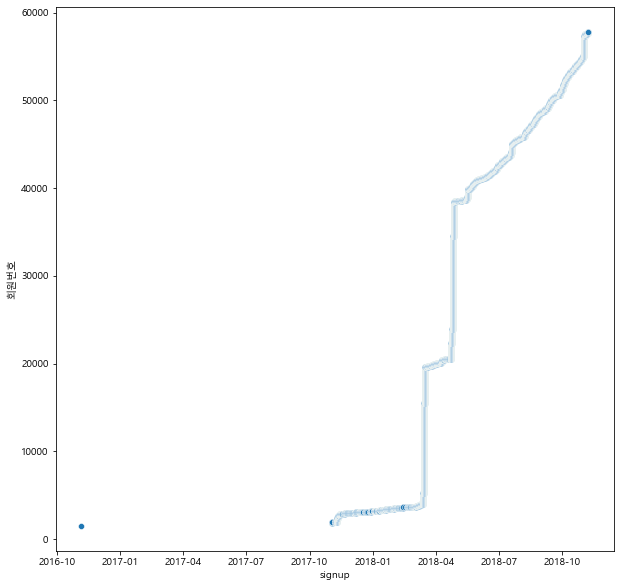

In [75]:
plt.figure(figsize=[10,10])
sns.scatterplot(data=df1_1, x='signup', y='회원번호') #2016년 가입자만 따로 동떨어져 있어 제거필요함.

In [76]:
dfcopy = df1_1[['회원번호','signup']]
dfcopy.head(1)

,회원번호,signup
0,1476,2016-11-05


In [77]:
dfcopy.drop([0], inplace = True)
dfcopy.head()

,회원번호,signup
1,1873,2017-11-02 15:54:32
2,1874,2017-11-02 15:55:11
3,1875,2017-11-02 16:08:18
4,1876,2017-11-02 16:10:06
5,1877,2017-11-02 16:11:23


<AxesSubplot:xlabel='signup', ylabel='회원번호'>

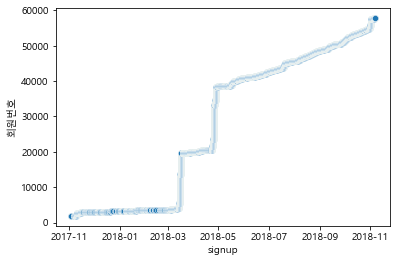

In [78]:
sns.scatterplot(data=dfcopy, x='signup', y='회원번호') #다소 그래프가 보기 난잡하여 총가입자를 따로 계산해 다시 출력할 필요 있음.

In [79]:
tmp = dfcopy[['signup']].copy()
tmp['총가입자'] = 1
tmp.rename(columns = {'signup':'가입일'}, inplace = True)
tmp.set_index('가입일', inplace=True)
tmp.head()

,총가입자
가입일,
2017-11-02 15:54:32,1
2017-11-02 15:55:11,1
2017-11-02 16:08:18,1
2017-11-02 16:10:06,1
2017-11-02 16:11:23,1


In [80]:
tmp.cumsum().head() #cumsum을 활용하여 총가입자를 계산

,총가입자
가입일,
2017-11-02 15:54:32,1
2017-11-02 15:55:11,2
2017-11-02 16:08:18,3
2017-11-02 16:10:06,4
2017-11-02 16:11:23,5


<AxesSubplot:xlabel='가입일'>

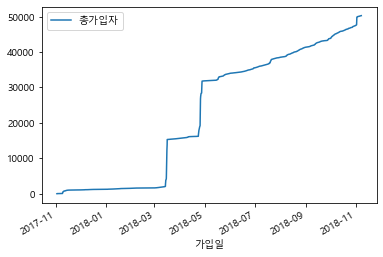

In [81]:
tmp.sort_index().cumsum().plot() #시간의 흐름에 따른 총가입자수 증가를 확인

## 기간당 매출건수로도 비교

In [82]:
df_salescopy['매출건수'] = 1
df_salescopy.head(3)

,상품번호,회원번호,주문번호,주문일시,수량,판매가,배송비,쿠폰할인액,진행구분,매출,주문일,주문월,매출건수
12,G1709201602_1482,1972,1711091120092237,2017-11-09 11:23:07,5,16000.0,2500.0,0.0,구매확정,16000.0,2017-11-09,2017-11,1
13,G1710161420_3420,2005,1711091146582243,2017-11-09 11:49:04,1,52900.0,0.0,0.0,구매확정,52900.0,2017-11-09,2017-11,1
14,G1710121442_3146,1953,1711091330402269,2017-11-09 13:33:28,1,43000.0,0.0,0.0,구매확정,43000.0,2017-11-09,2017-11,1


In [83]:
dfc_monthly = df_salescopy.groupby('주문월')['매출건수'].sum().reset_index()
dfc_monthly.head(3)

,주문월,매출건수
0,2017-11,330
1,2017-12,259
2,2018-01,276


In [84]:
#가입월별로 구분키 위해 월별 to_period로 가입월행을 생성
dfcopy['가입월'] = dfcopy['signup'].dt.to_period('M')

In [85]:
dfcopy.head(3)

,회원번호,signup,가입월
1,1873,2017-11-02 15:54:32,2017-11
2,1874,2017-11-02 15:55:11,2017-11
3,1875,2017-11-02 16:08:18,2017-11


In [86]:
#월당 가입건수를 계산
dfcopy['가입건수'] = 1
dfr_monthly = dfcopy.groupby('가입월')['가입건수'].sum().reset_index()
dfr_monthly

,가입월,가입건수
0,2017-11,1065
1,2017-12,168
2,2018-01,292
3,2018-02,109
4,2018-03,14003
5,2018-04,16225
6,2018-05,2141
7,2018-06,1556
8,2018-07,2982
9,2018-08,2833


In [87]:
#가입월과 주문월을 합치기 위하여 '월' 렬로 이름변경
dfr_monthly.rename(columns = {'가입월':'월'}, inplace=True)

In [88]:
dfc_monthly.rename(columns = {'주문월':'월'}, inplace=True)

In [89]:
#'월'을 기준으로 가입자 정보와 매출정보를 결합
dft_monthly = pd.merge(dfr_monthly, dfc_monthly, on=['월'])

In [90]:
#시각화를 위해 '월'정보를 period[M] 타입에서 oject 로 변환 후, 다시금 datetime으로 변환 (period>datetime 직접변환이 되지않음.)
dft_monthly['월'] = dft_monthly['월'].astype('str')

In [91]:
dft_monthly['월']

0     2017-11
1     2017-12
2     2018-01
3     2018-02
4     2018-03
5     2018-04
6     2018-05
7     2018-06
8     2018-07
9     2018-08
10    2018-09
11    2018-10
12    2018-11
Name: 월, dtype: object

In [92]:
dft_monthly['월'] = pd.to_datetime(dft_monthly.월)

## 기간에 따른 가입자와 매출 비교

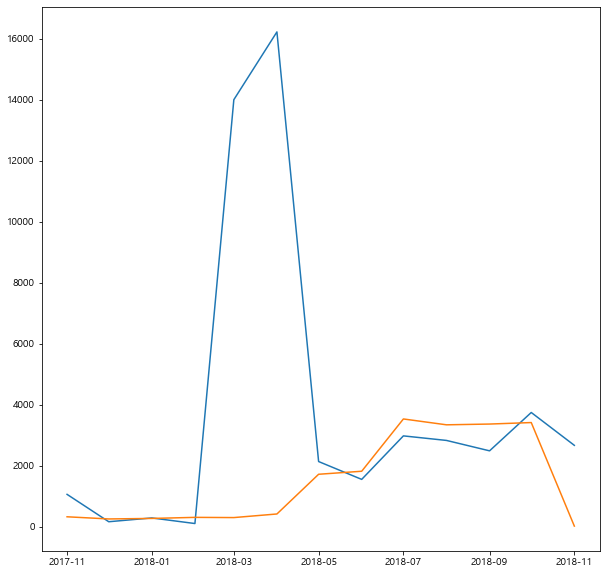

In [93]:
#월별 가입자수와 매출액을 비교
#확실히 가입자수가 늘어난 직후에 매출액이 증가함을 확인할 수 있음.
plt.figure(figsize=(10,10))
plt.plot(dft_monthly['월'],dft_monthly['가입건수'])
plt.plot(dft_monthly['월'],dft_monthly['매출건수'])


In [204]:
#총 회원정보 행 수 = 등록된 회원 수 확인 -> 50288명
df1_1.shape[0]

50288

In [205]:
#실제 한번이라도 구매이력이 있는 회원들을 확인
df_member = df1_1[['회원번호','회원등급','가입일','성별','나이','자주쓰는배송지 도로명']]
df_member.head(3)

,회원번호,회원등급,가입일,성별,나이,자주쓰는배송지 도로명
0,1476,임직원,2016-11-05 00:00:00,M,31,서울 금천구 가마산로 70
1,1873,임직원,2017-11-02 15:54:32,M,32,경기 고양시 일산서구 고양대로 620
2,1874,임직원,2017-11-02 15:55:11,M,39,경기 성남시 분당구 판교역로 4


In [206]:
#주문정보에서 주문을 하여 '주문일시' 정보가 있는 회원들을 가져옴.
df_buyer = df3_1[['주문일시','회원번호']]
df_buyer.head(3)

,주문일시,회원번호
0,2017-11-08 08:46:26,1876
1,2017-11-08 09:04:28,1876
2,2017-11-08 09:33:20,1882


In [207]:
#회원정보를 기준으로 주문일시가 있는 회원들에게 그 정보를 가져옴
df_customer = pd.merge(df_member, df_buyer, on=['회원번호'], how = 'left')
df_customer.head(3)

,회원번호,회원등급,가입일,성별,나이,자주쓰는배송지 도로명,주문일시
0,1476,임직원,2016-11-05 00:00:00,M,31,서울 금천구 가마산로 70,NaN
1,1873,임직원,2017-11-02 15:54:32,M,32,경기 고양시 일산서구 고양대로 620,2017-11-08 09:51:13
2,1873,임직원,2017-11-02 15:54:32,M,32,경기 고양시 일산서구 고양대로 620,2017-11-08 11:28:47


In [208]:
#주문일시가 존재하지 않는, 즉 실제 주문한 적이 없는 유저들을 제거 후, 주문이력이 있는 회원 수를 확인.
df_customer = df_customer[df_customer.주문일시.notnull()]
df_customer.shape[0]

20336

# 남녀 고객 선호상품 분석
- 고객층 심층분석1

## 전처리

In [94]:
df11 = df1_1[['회원번호','성별']] #회원번호 및 성별 추출

In [95]:
df12 = df3_1[['회원번호','주문번호','상품번호','상품명','주문일시']] #회원번호, 상품번호, 상품명 추출

In [96]:
df_all = pd.merge(df11, df12, on=['회원번호'], how='left') #1-1 과 3-1 머지로 봉합

In [97]:
df13 = df2_1[['상품번호','상품명','카테고리명']] #카테고리명 추가로 추출

In [98]:
df_all2 = pd.merge(df_all, df13,on = '상품번호') #1-1,3-1 봉합된 파일과 카테고리명 추가 한 파일 봉합

In [99]:
df_all2.isnull().sum() # 결측지 확인

회원번호      0
성별        0
주문번호      0
상품번호      0
상품명_x     0
주문일시      0
상품명_y     0
카테고리명    41
dtype: int64

In [100]:
df = df_all2.dropna() # 결측지 제거

In [101]:
df.isnull().sum() #결측지 재확인

회원번호     0
성별       0
주문번호     0
상품번호     0
상품명_x    0
주문일시     0
상품명_y    0
카테고리명    0
dtype: int64

In [102]:
df.loc[df['성별']== '-'] = np.nan # '-' 값 nan으로 바꾸기

In [103]:
df = df.dropna(axis=0) # '-' 값 지우기

In [104]:
df_all3 = pd.merge(df, df_sales,on='상품번호') #df , sales 합체

In [105]:
df_all3m = df_all3.loc[(df_all3['성별']=='M')] #all3 성별 남성만 분류

In [106]:
df_all3f = df_all3.loc[df_all3['성별']=='F'] #all3 성별 여성만 분류

In [107]:
df_all4 = pd.DataFrame(df_all3.groupby(['카테고리명','성별'])['매출'].sum()) # all3 에서 성별 남성,여성 별 매출 분류
df_all4.T # 카테고리별에 따른 남자 여자 매출확인

카테고리명 2018 추석선물 DIY가구/손잡이/도어락                    공구   공구/철물/목재/리폼  \
성별            F             F           M         M             F   
매출     280000.0    16075740.0  37626410.0  313540.0  2.720976e+09   

카테고리명                  벽지/바닥재/타일                       생활가전                \
성별                M            F            M             F             M   
매출     1.791772e+10  178961695.0  141194293.0  6.340762e+09  2.287551e+10   

카테고리명  ...    침실/거실/주방가구  페인트/스텐실/도구                 하드웨어   학생/사무/유아동가구  \
성별     ...             M           F           M        M             F   
매출     ...  1.216352e+09  73621650.0  95092100.0  22410.0  1.749374e+09   

카테고리명                     홈데코        홈데코레이션                    홈퍼니싱  
성별                M         M             F             M         M  
매출     1.261682e+09  334410.0  4.581308e+09  2.121348e+09  679200.0  

[1 rows x 32 columns]

In [108]:
df_sex = df_all4.reset_index() #시각화에 사용하기 위해 성별합산(df_all)에서 카테고리를 언인덱싱화

## 남녀 고객별 매출 시각화

<Figure size 1440x1440 with 0 Axes>

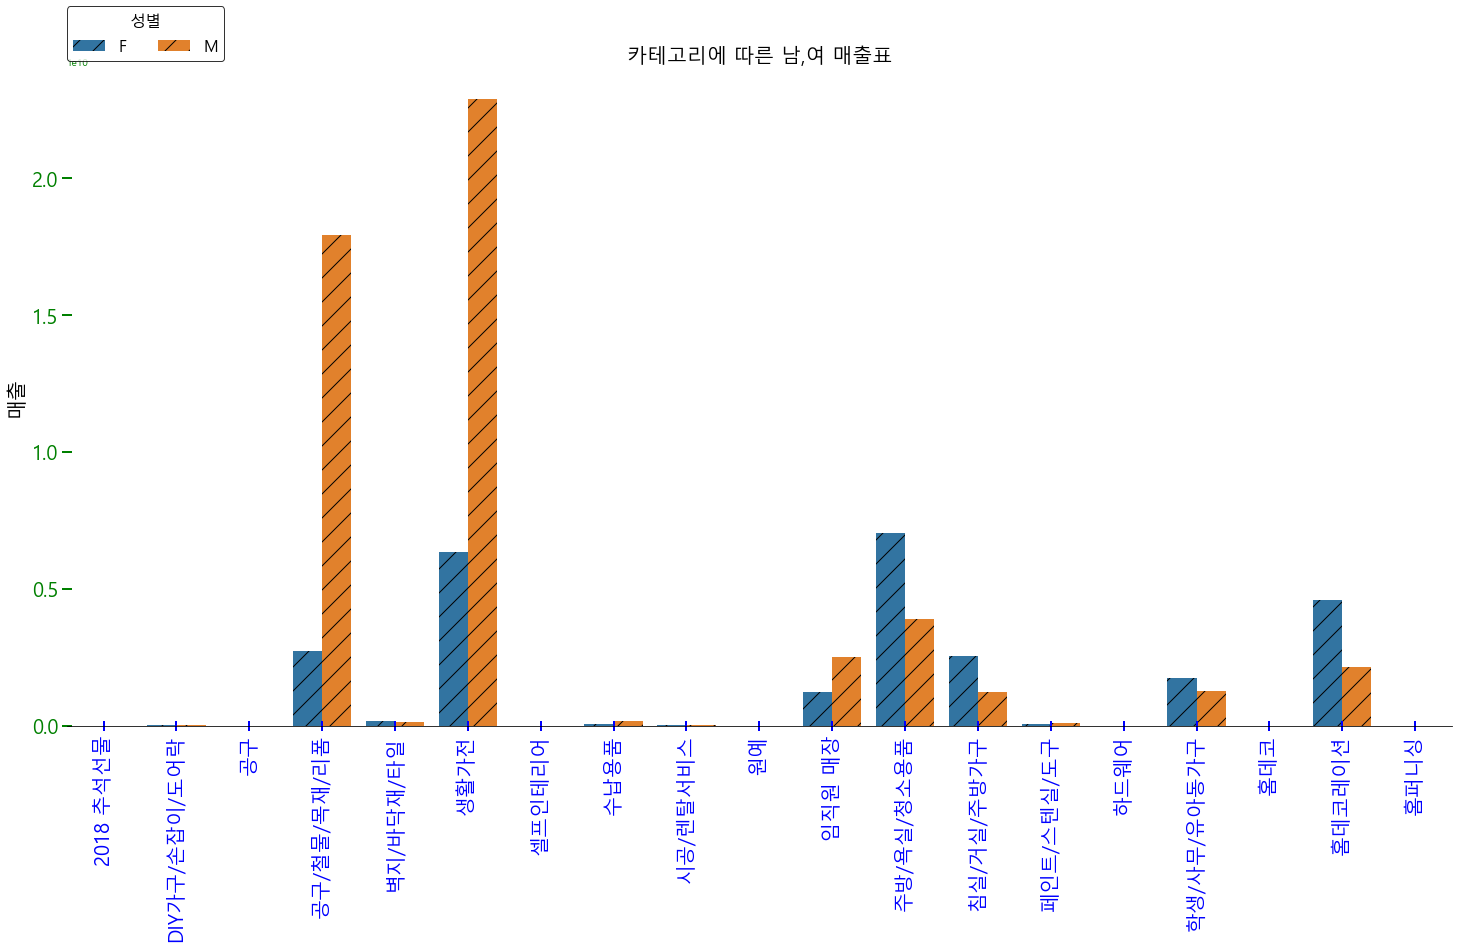

In [109]:
plt.figure(figsize=[20,20])
g = sns.catplot(
data=df_sex, kind="bar",
x="카테고리명", y="매출",hue ='성별', height=10, legend = False, aspect=2,hatch='/')
g.despine(left=True)
g.set_axis_labels("", "매출")
plt.xticks(rotation=90,size=20)
plt.yticks(size=20)
plt.ylabel('매출', fontsize=20)
plt.title('카테고리에 따른 남,여 매출표', size=20)
plt.legend(title='성별',loc=(0,1.01), ncol=3, fontsize=16, edgecolor='k',title_fontsize=16)

plt.tick_params(axis='x', direction='inout',length=10,width=2,colors='b',labelsize=20 )
plt.tick_params(axis='y', direction='inout',length=10,width=2,colors='g',labelsize=20 )

In [110]:
df_all3['매출건수'] = 1 #매출건수를 계산하기 위한 컬럼
df_all3.head(1)

,회원번호_x,성별,주문번호_x,상품번호,상품명_x,주문일시_x,상품명_y,카테고리명,회원번호_y,주문번호_y,주문일시_y,수량,판매가,배송비,쿠폰할인액,진행구분,매출,매출건수
0,1873.0,M,1.711081e+15,G1710311848_6934,(임직원 전용)[하츠] 직접 설치하는 이지 셀프 주방 렌지후드 (DIY 후드),2017-11-08 11:28:47,[하츠] 직접 설치하는 이지 셀프 주방 렌지후드 (DIY 후드),임직원 매장,2354,1711130806232752,2017-11-13 08:14:35,1,84000.0,0.0,16800.0,구매확정,67200.0,1


In [111]:
df_mm = df_all3.loc[df_all3['성별']=='M'] #매출건수에 따른 남자 분류

In [112]:
df_mf = df_all3.loc[df_all3['성별']=='F'] #매출건수에 따른 여자 분류

### 매출건수에 따른 남자, 여자 분류

In [113]:
df_m = pd.DataFrame(df_all3.groupby(['카테고리명','성별'])['매출건수'].sum())
df_m.T # 카테고리명에 따른 여자 매출건수

카테고리명 2018 추석선물 DIY가구/손잡이/도어락        공구 공구/철물/목재/리폼         벽지/바닥재/타일        \
성별            F             F     M   M           F       M         F     M   
매출건수          2           728  1861  22       62258  803562      4987  4792   

카테고리명   생활가전          ... 침실/거실/주방가구 페인트/스텐실/도구       하드웨어 학생/사무/유아동가구         \
성별         F       M  ...          M          F     M    M           F      M   
매출건수   41070  108166  ...      18499       1569  2066   10       16937  12783   

카테고리명 홈데코  홈데코레이션        홈퍼니싱  
성별      M       F      M    M  
매출건수   17  143819  63884    1  

[1 rows x 32 columns]

### 카테고리에 따른 남자 매출건수 분류

In [114]:
df_m_m = pd.DataFrame(df_mm.groupby('카테고리명')['매출건수'].sum())
df_m_m.T # 카테고리명에 따른 남자 매출건수

카테고리명,DIY가구/손잡이/도어락,공구,공구/철물/목재/리폼,벽지/바닥재/타일,생활가전,셀프인테리어,수납용품,시공/렌탈서비스,원예,임직원 매장,주방/욕실/청소용품,침실/거실/주방가구,페인트/스텐실/도구,하드웨어,학생/사무/유아동가구,홈데코,홈데코레이션,홈퍼니싱
매출건수,1861,22,803562,4792,108166,32,12697,101,1,14636,228242,18499,2066,10,12783,17,63884,1


### 카테고리에 따른 여자 매출건수 분류

In [115]:
df_m_f = pd.DataFrame(df_mf.groupby('카테고리명')['매출건수'].sum())
df_m_f.T # 카테고리에 따른 남자, 여자 매출 건수 확인

카테고리명,2018 추석선물,DIY가구/손잡이/도어락,공구/철물/목재/리폼,벽지/바닥재/타일,생활가전,셀프인테리어,수납용품,시공/렌탈서비스,임직원 매장,주방/욕실/청소용품,침실/거실/주방가구,페인트/스텐실/도구,학생/사무/유아동가구,홈데코레이션
매출건수,2,728,62258,4987,41070,11,3563,25,6275,263689,42697,1569,16937,143819


In [116]:
df_ca = df_m.reset_index() #시각화에 사용하기 위해 성별합산(df_m)에서 카테고리를 언인덱싱화
df_ca.head(2)

,카테고리명,성별,매출건수
0,2018 추석선물,F,2
1,DIY가구/손잡이/도어락,F,728


## 남녀 고객별 매출건수 시각화

<Figure size 1440x1440 with 0 Axes>

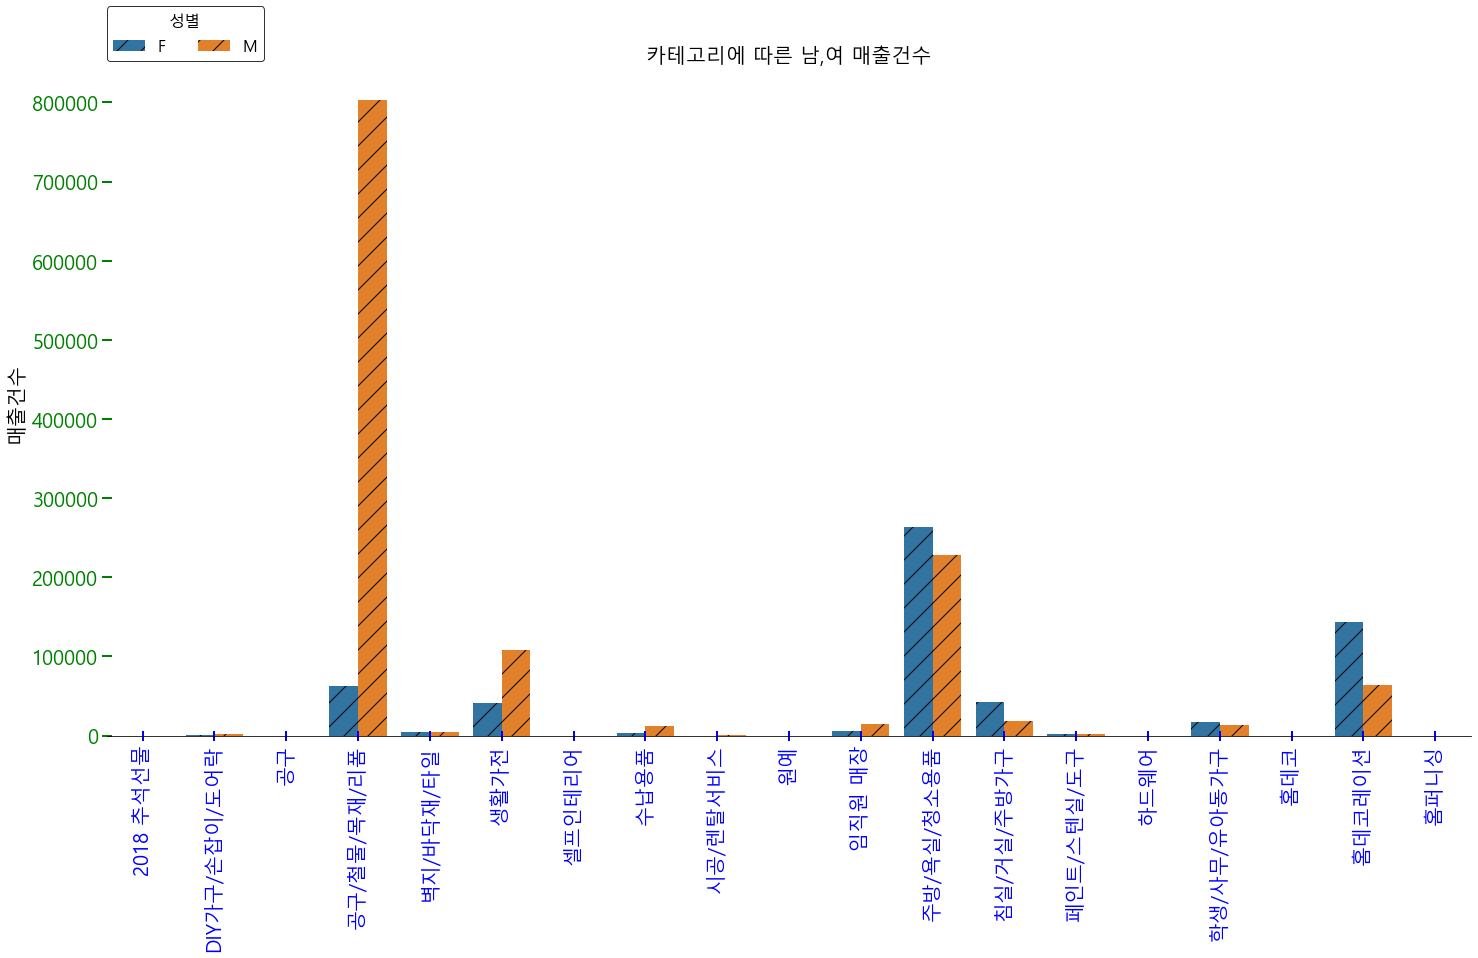

In [117]:
plt.figure(figsize=[20,20])
g = sns.catplot(
data=df_ca, kind="bar",
x="카테고리명", y="매출건수", hue="성별", legend = False, height=10, aspect=2,hatch='/')
g.despine(left=True)
g.set_axis_labels("", "매출건수")
plt.xticks(rotation=90,size=20)
plt.yticks(size=20)
plt.ylabel('매출건수', fontsize=20)
plt.title('카테고리에 따른 남,여 매출건수', size=20)
plt.legend(title='성별',loc=(0,1.01), ncol=3, fontsize=16, edgecolor='k',title_fontsize=16)

plt.tick_params(axis='x',direction='inout',length=10,width=2,colors='b',labelsize=20 )
plt.tick_params(axis='y',direction='inout',length=10,width=2,colors='g',labelsize=20 )

# 연령대별 매출 분석
- 고객층 심층분석2

## 전처리

In [118]:
# 결측치 제거
df1_1copy=df1_1.copy()
df1_1copy=df1_1copy.dropna(axis=0)

In [119]:
# 결측치 제거 확인
df1_1copy.isnull().sum()

회원번호           0
회원등급           0
가입일            0
최종방문일          0
본인인증           0
성별             0
나이             0
자주쓰는배송지 도로명    0
자주쓰는배송지 지번     0
signup         0
dtype: int64

In [120]:
# 필요한 부분만 선택
dfQ = df1_1copy[['회원번호','나이']]

In [121]:
# 회원번호를 기준으로 합성 ( 1-1 , 매출정보)
df_one=pd.merge(df_sales,dfQ, on = '회원번호', how = 'left')

In [122]:
# 필요한 부분만 선택
dfW = df_one[['주문번호','상품번호','회원번호','나이','매출']]

In [123]:
dfW.dtypes # 나이가 object로 되있는걸 확인

주문번호      int64
상품번호     object
회원번호      int64
나이       object
매출      float64
dtype: object

In [124]:
dfW.loc[dfW['나이'] == '-' ] = np.nan #int로 바꾸기 위해 '-'값을 제거

In [125]:
dfW=dfW.dropna(axis=0)

In [126]:
dfW = dfW.astype({'나이':'int'})

In [127]:
dfW.dtypes #나이가 int로 변경된 것을 확인

주문번호    float64
상품번호     object
회원번호    float64
나이        int32
매출      float64
dtype: object

In [128]:
#연령대 열을 새로 생성하여 나이에 따른 분류
dfW.loc[dfW['나이']<=19, '연령대'] = '10대이하'
dfW.loc[dfW['나이'].between(20,29), '연령대'] = '20대'
dfW.loc[dfW['나이'].between(30,39), '연령대'] = '30대'
dfW.loc[dfW['나이'].between(40,49), '연령대'] = '40대'
dfW.loc[dfW['나이'].between(50,59), '연령대'] = '50대'
dfW.loc[dfW['나이'].between(60,69), '연령대'] = '60대'
dfW.loc[dfW['나이']>69, '연령대'] = '70대이상'
dfW.tail(5)

,주문번호,상품번호,회원번호,나이,매출,연령대
19144,1.811021e+15,G1807061726_9714,3233.0,34,21880.0,30대
19149,1.811032e+15,G1805251443_5866,2143.0,53,25870.0,50대
19150,1.811040e+15,G1710281113_6189,2427.0,28,23920.0,20대
19151,1.811051e+15,G1805081743_6909,2427.0,28,189000.0,20대
19155,1.811011e+15,G1806071450_1361,2079.0,47,3400.0,40대


In [129]:
df13 = df2_1[['상품번호','상품명','카테고리명']] # 카테고리명 추가로 추출

In [130]:
df_agecat = pd.merge(dfW, df13)
df_agecat.head(3)

,주문번호,상품번호,회원번호,나이,매출,연령대,상품명,카테고리명
0,1.711091e+15,G1709201602_1482,1972.0,46,16000.0,40대,[3M] 작업용 보호안경,벽지/바닥재/타일
1,1.711091e+15,G1710161420_3420,2005.0,45,52900.0,40대,[씨원] 듀얼 프리미엄 3단요추의자,학생/사무/유아동가구
2,1.712121e+15,G1710161420_3420,1981.0,55,42320.0,50대,[씨원] 듀얼 프리미엄 3단요추의자,학생/사무/유아동가구


In [131]:
df_agecat.isnull().sum()

주문번호      0
상품번호      0
회원번호      0
나이        0
매출        0
연령대       0
상품명       0
카테고리명    17
dtype: int64

In [132]:
df_agecat = df_agecat.dropna()

In [133]:
df_agecat.isnull().sum() #결측치 제거 확인

주문번호     0
상품번호     0
회원번호     0
나이       0
매출       0
연령대      0
상품명      0
카테고리명    0
dtype: int64

## 제품 카테고리별 나잇대별 매출건수 시각화

In [134]:
#연령대별 매출 건수 카테고리별로 비교

df_agecat['매출건수'] = 1

In [135]:
df_ACcount=df_agecat.groupby(['연령대','카테고리명'],as_index=False).sum().pivot(index='연령대',columns='카테고리명',values='매출건수')

In [136]:
df_ACcount.head(3)

카테고리명,2018 추석선물,DIY가구/손잡이/도어락,공구,공구/철물/목재/리폼,벽지/바닥재/타일,생활가전,수납용품,시공/렌탈서비스,원예,임직원 매장,주방/욕실/청소용품,침실/거실/주방가구,페인트/스텐실/도구,하드웨어,학생/사무/유아동가구,홈데코,홈데코레이션,홈퍼니싱
연령대,,,,,,,,,,,,,,,,,,
10대이하,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20대,NaN,4.0,2.0,60.0,18.0,179.0,13.0,1.0,NaN,215.0,103.0,45.0,4.0,NaN,38.0,NaN,44.0,NaN
30대,1.0,27.0,NaN,187.0,59.0,463.0,64.0,2.0,NaN,644.0,326.0,107.0,29.0,NaN,75.0,3.0,137.0,1.0


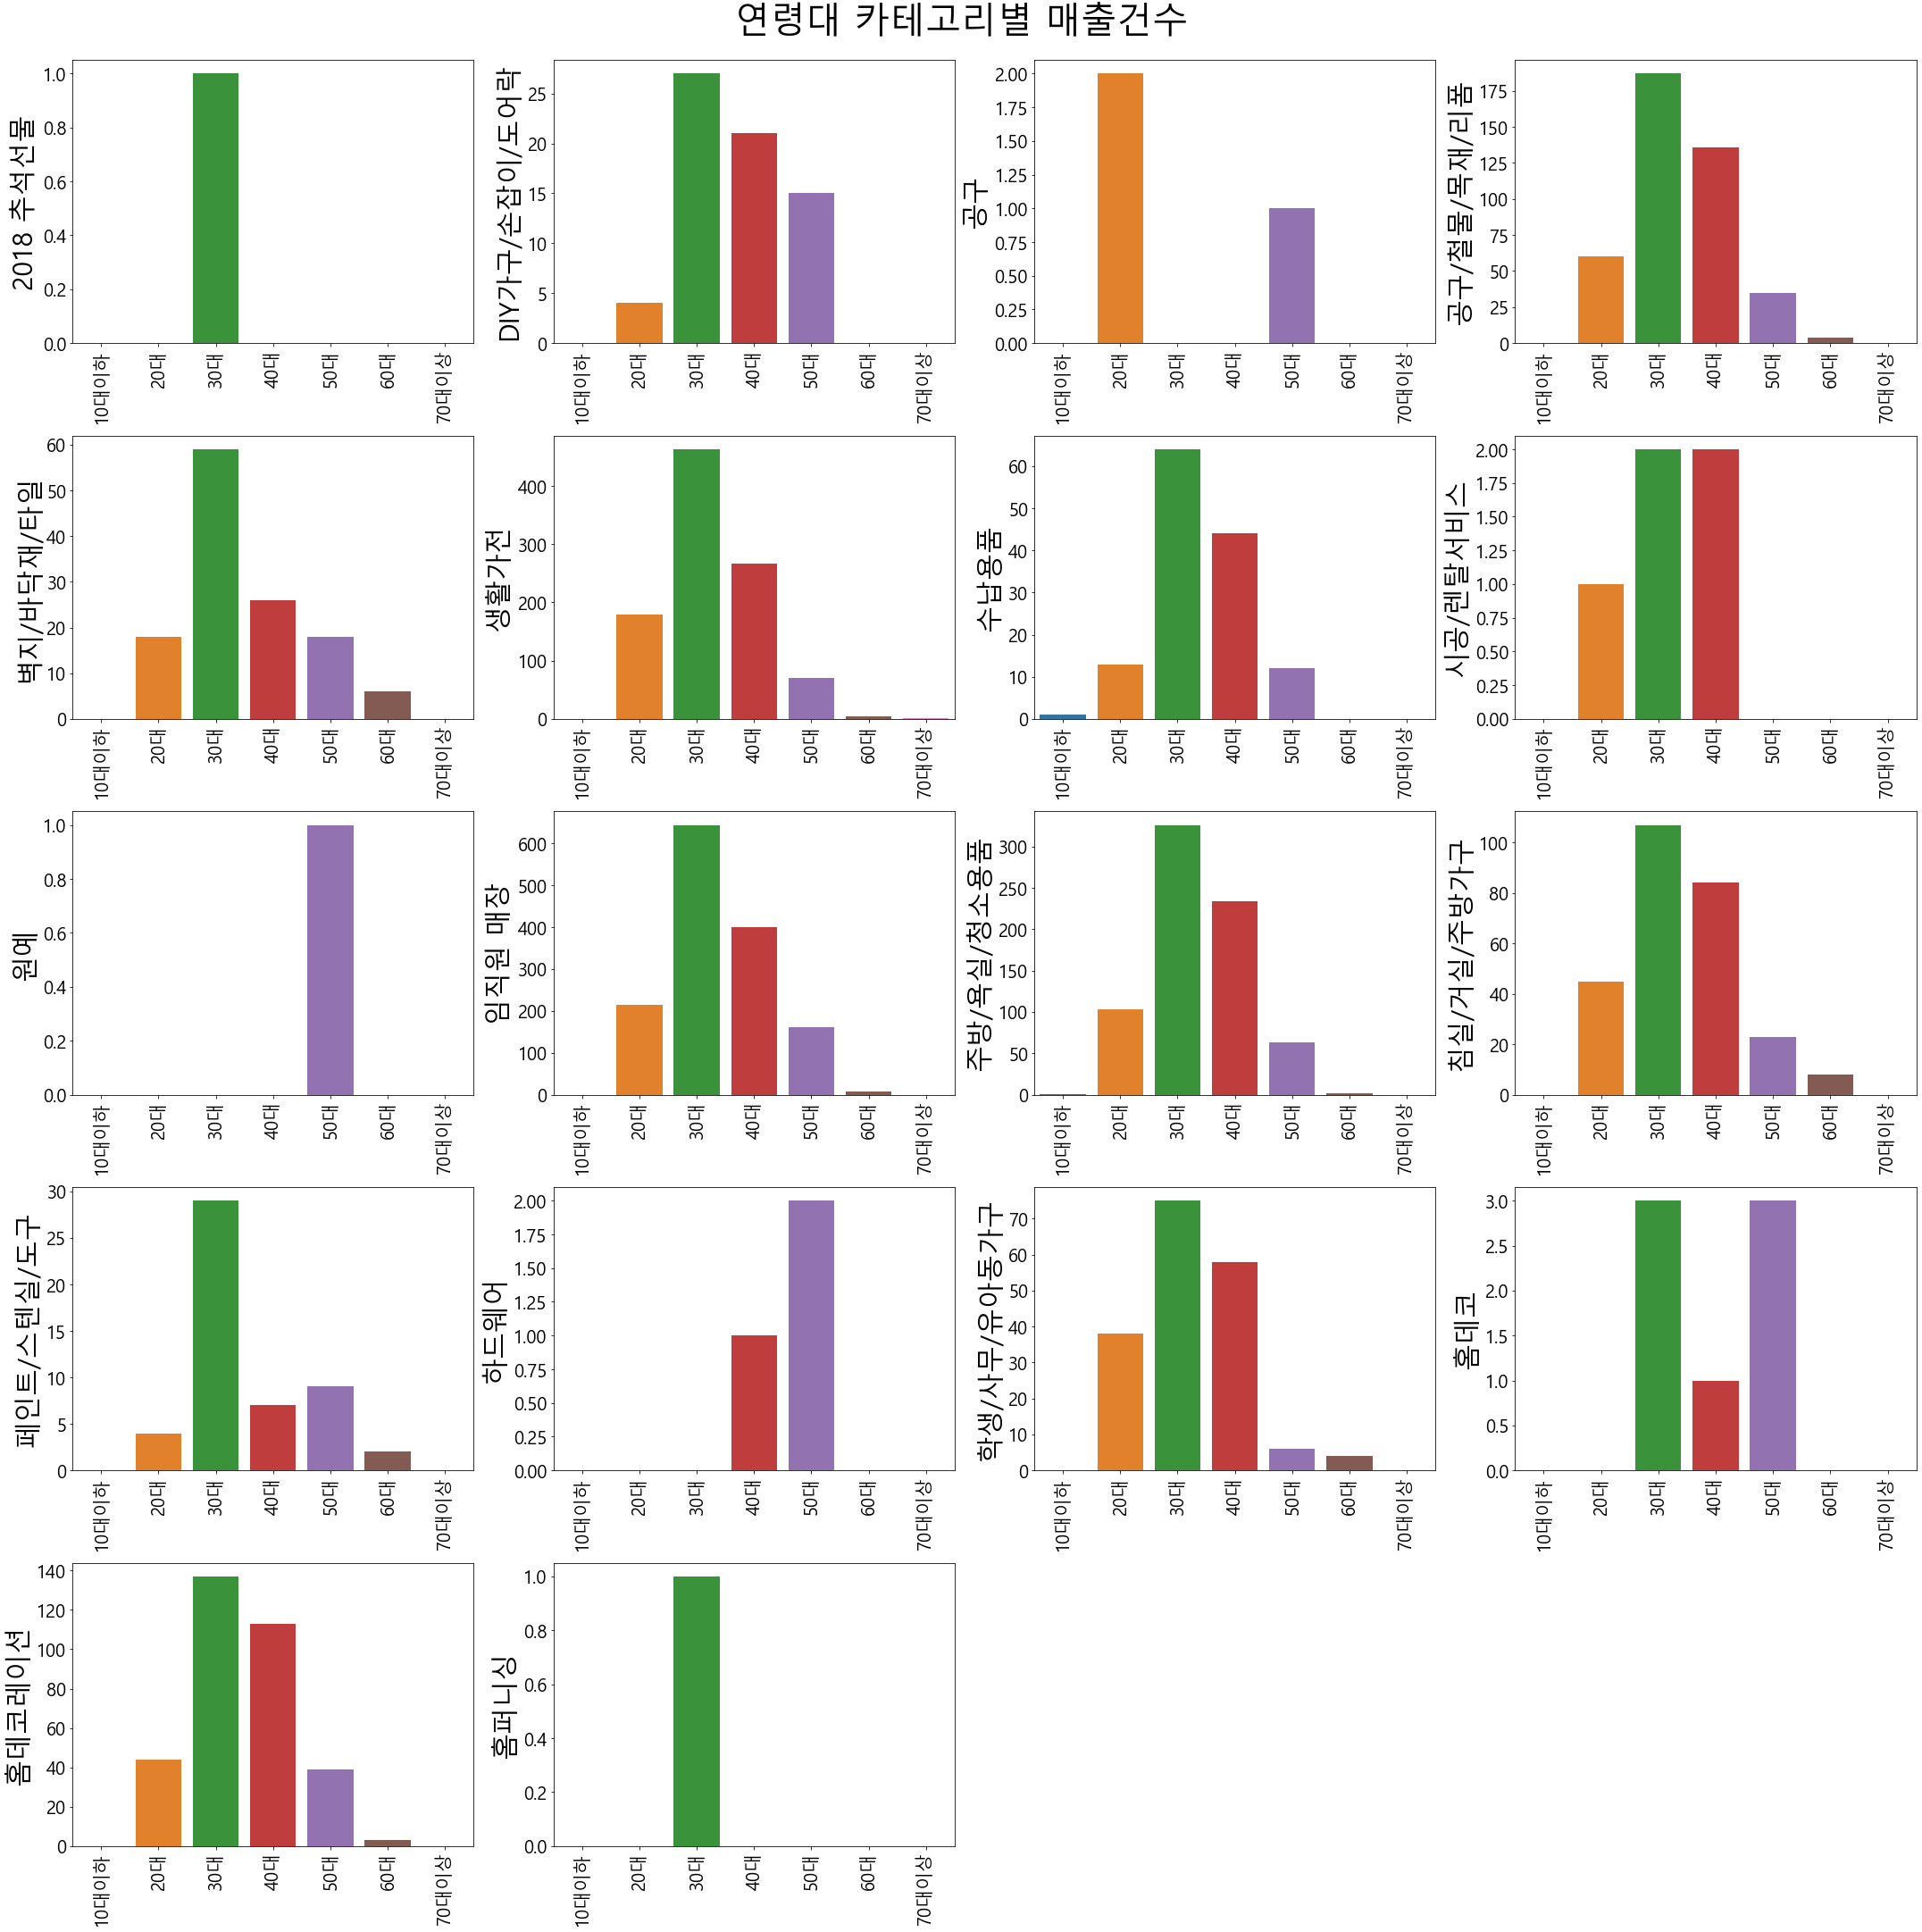

In [137]:
fig=plt.figure(figsize=(30,30))
for i,col in zip(range(1,19),df_ACcount.columns):
    plt.subplot(5,4,i)
    sns.barplot(data=df_ACcount,x=df_ACcount.index,y=df_ACcount[col],label=col)
    plt.xticks(rotation=90,size=20)
    plt.yticks(size=20)
    plt.xlabel('')
    plt.ylabel(col,size=30)
    
fig.suptitle('연령대 카테고리별 매출건수',size=40,y=1)
plt.tight_layout()
plt.show()

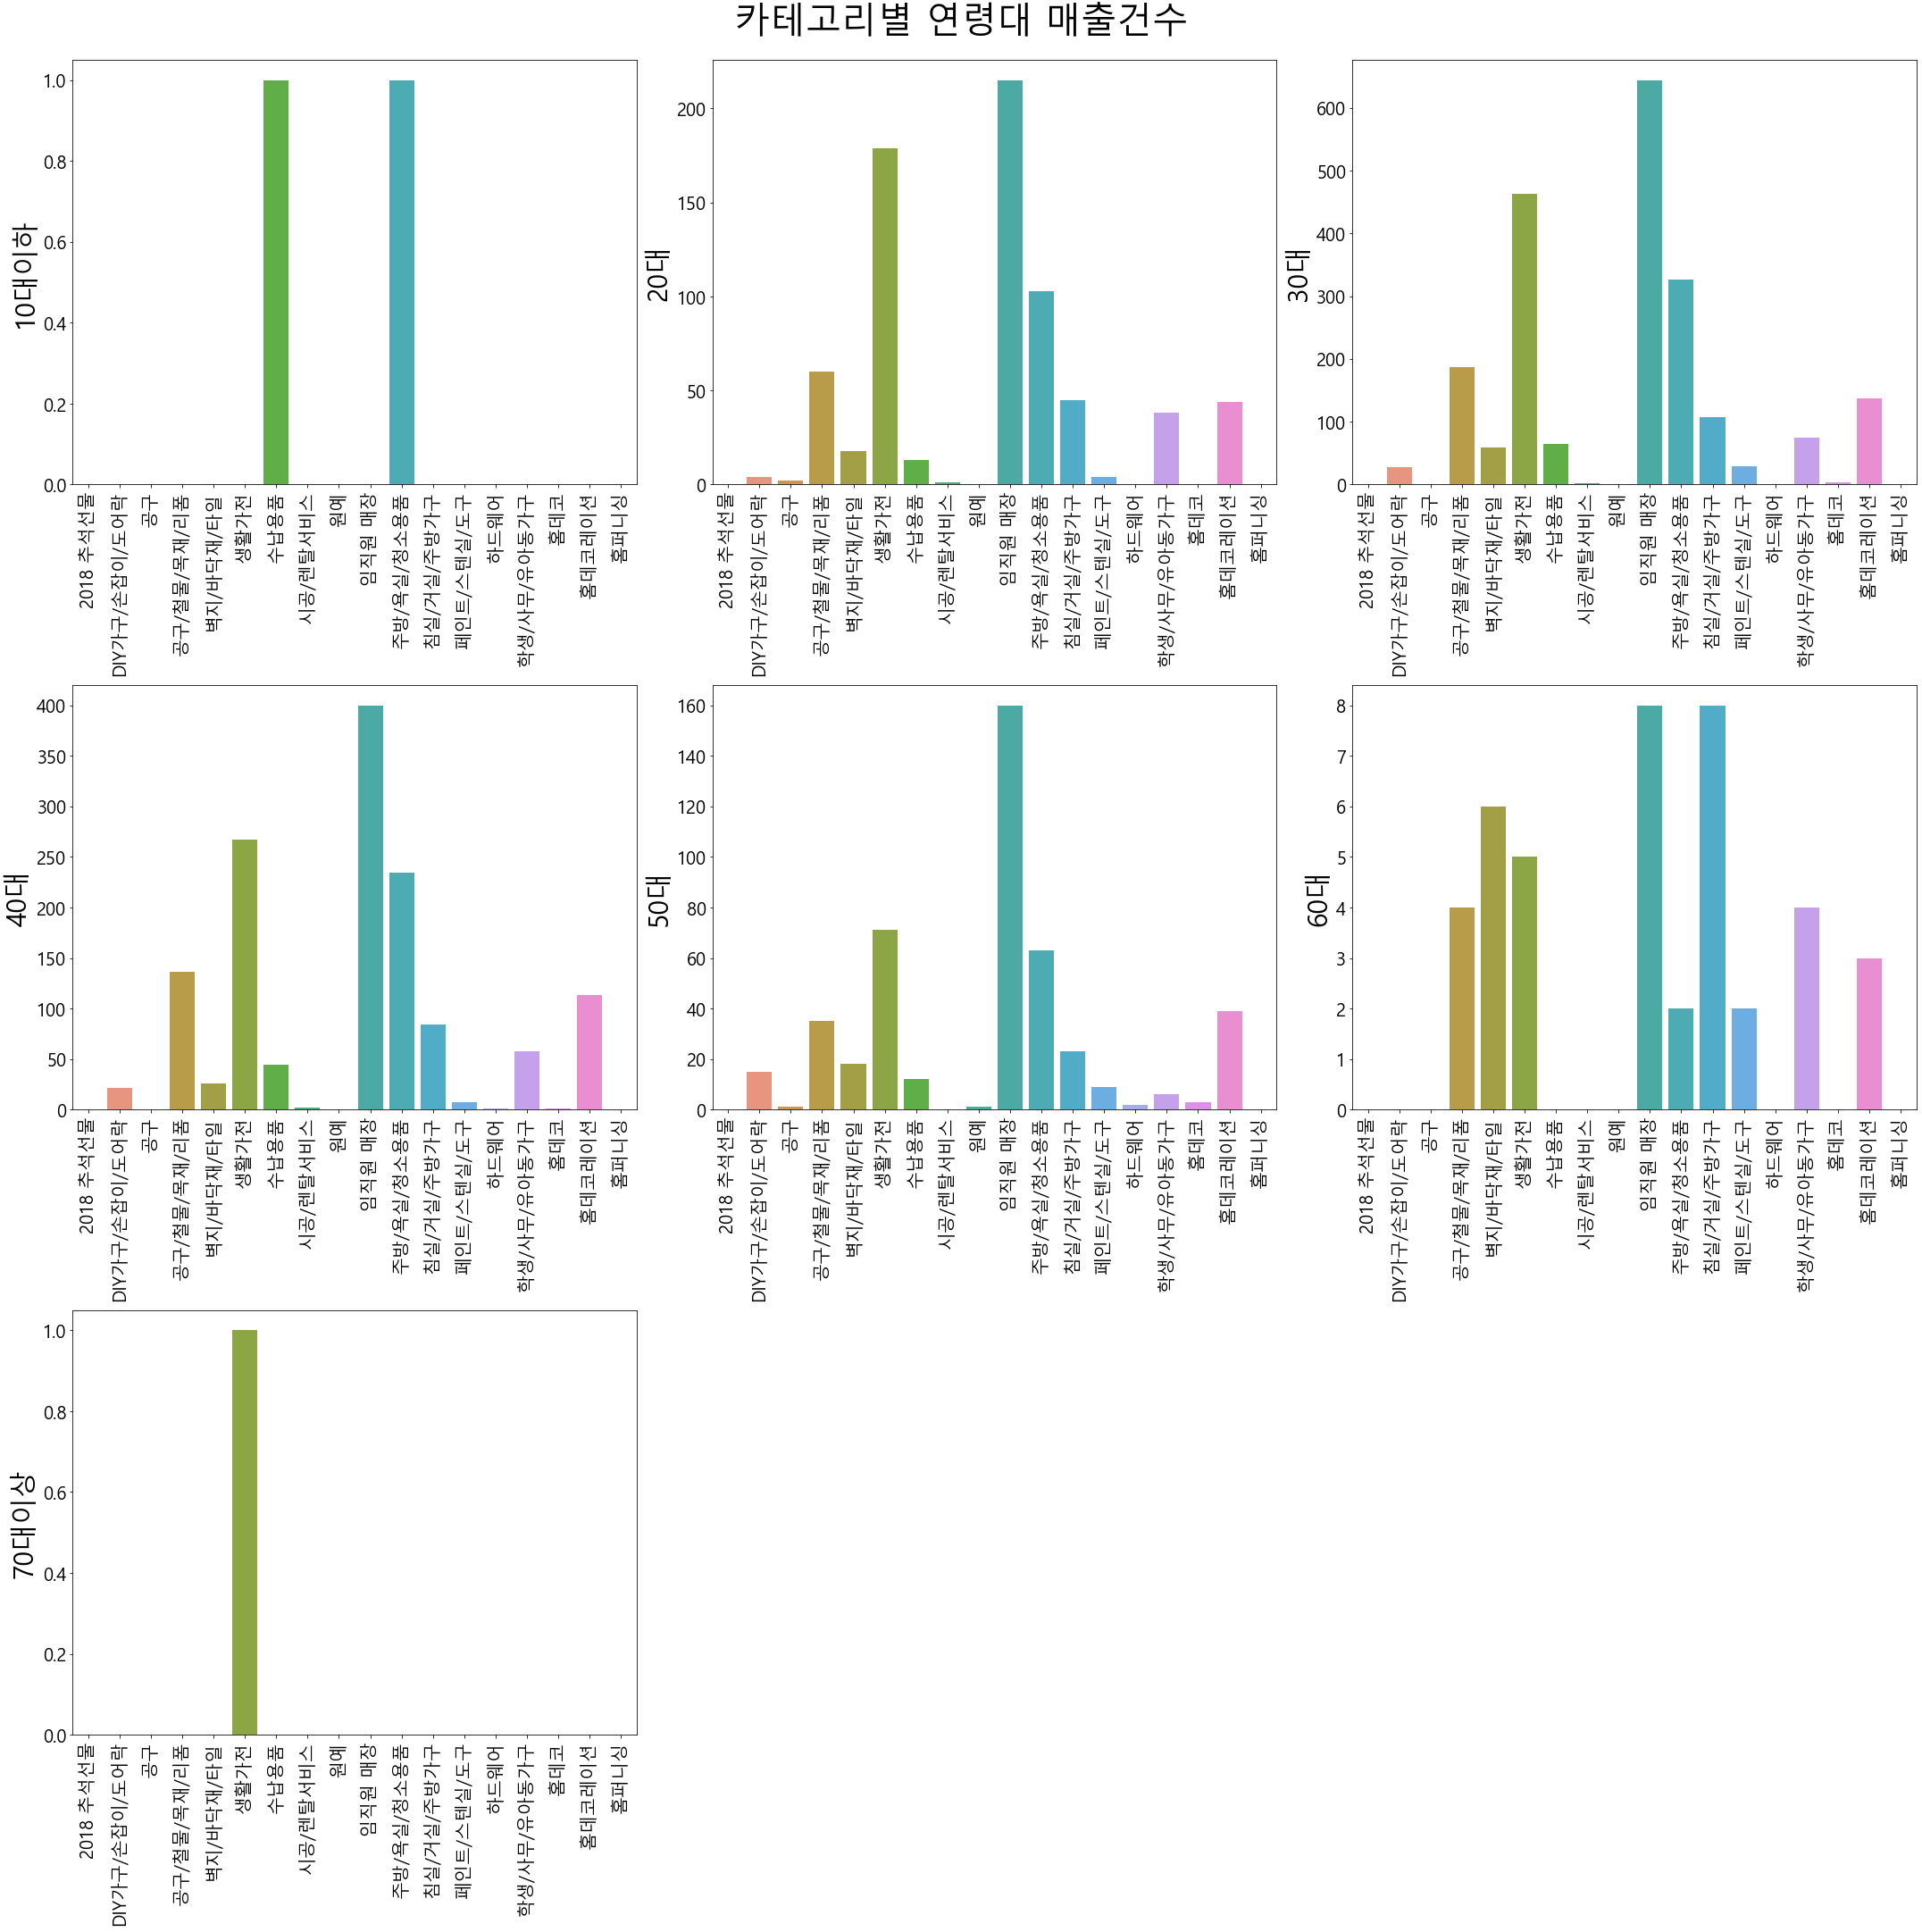

In [138]:
#마찬가지로, 카테고리별 연령대 매출건수 또한 비교를 위해 시각화.

df_CAcount=df_agecat.groupby(['카테고리명','연령대'],as_index=False).sum().pivot(index='카테고리명',columns='연령대',values='매출건수')

fig=plt.figure(figsize=(30,30))
for i,col in zip(range(1,8),df_CAcount.columns):
    plt.subplot(3,3,i)
    sns.barplot(data=df_CAcount,x=df_CAcount.index,y=df_CAcount[col],label=col)
    plt.xticks(rotation=90,size=20)
    plt.yticks(size=20)
    plt.xlabel('')
    plt.ylabel(col,size=30)
    
fig.suptitle('카테고리별 연령대 매출건수',size=40,y=1)
plt.tight_layout()
plt.show()

## 제품 카테고리별 나잇대별 매출 시각화

In [139]:
df_AC=df_agecat.groupby(['연령대','카테고리명'],as_index=False).sum().pivot(index='연령대',columns='카테고리명',values='매출')

In [140]:
df_AC.head(5)
#나이대 - 상품 카테고리별로 매출액을 합산하여 집계. 시각화 하기 위하여 구매되지 않은 카테고리까지 포함하여 DF화

카테고리명,2018 추석선물,DIY가구/손잡이/도어락,공구,공구/철물/목재/리폼,벽지/바닥재/타일,생활가전,수납용품,시공/렌탈서비스,원예,임직원 매장,주방/욕실/청소용품,침실/거실/주방가구,페인트/스텐실/도구,하드웨어,학생/사무/유아동가구,홈데코,홈데코레이션,홈퍼니싱
연령대,,,,,,,,,,,,,,,,,,
10대이하,NaN,NaN,NaN,NaN,NaN,NaN,34110.0,NaN,NaN,NaN,28000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20대,NaN,203730.0,3440.0,3117680.0,873310.0,28455457.0,252480.0,118400.0,NaN,33001196.0,2289071.0,2993979.0,282100.0,NaN,11652164.0,NaN,1000130.0,NaN
30대,80000.0,1183310.0,NaN,9204426.0,1769747.0,96260542.0,1240990.0,306020.0,NaN,122441718.0,6709011.0,11998834.0,659530.0,NaN,9063882.0,52400.0,3475640.0,679200.0
40대,NaN,321450.0,NaN,5973816.0,697496.0,35890202.0,1159040.0,3195660.0,NaN,72212179.0,4758310.0,11838034.0,130940.0,1260.0,9559430.0,35440.0,3024073.0,NaN
50대,NaN,413910.0,740.0,1418790.0,515150.0,13639300.0,303020.0,NaN,1280.0,21552040.0,1228940.0,2329720.0,107890.0,4670.0,297960.0,55930.0,1419707.0,NaN


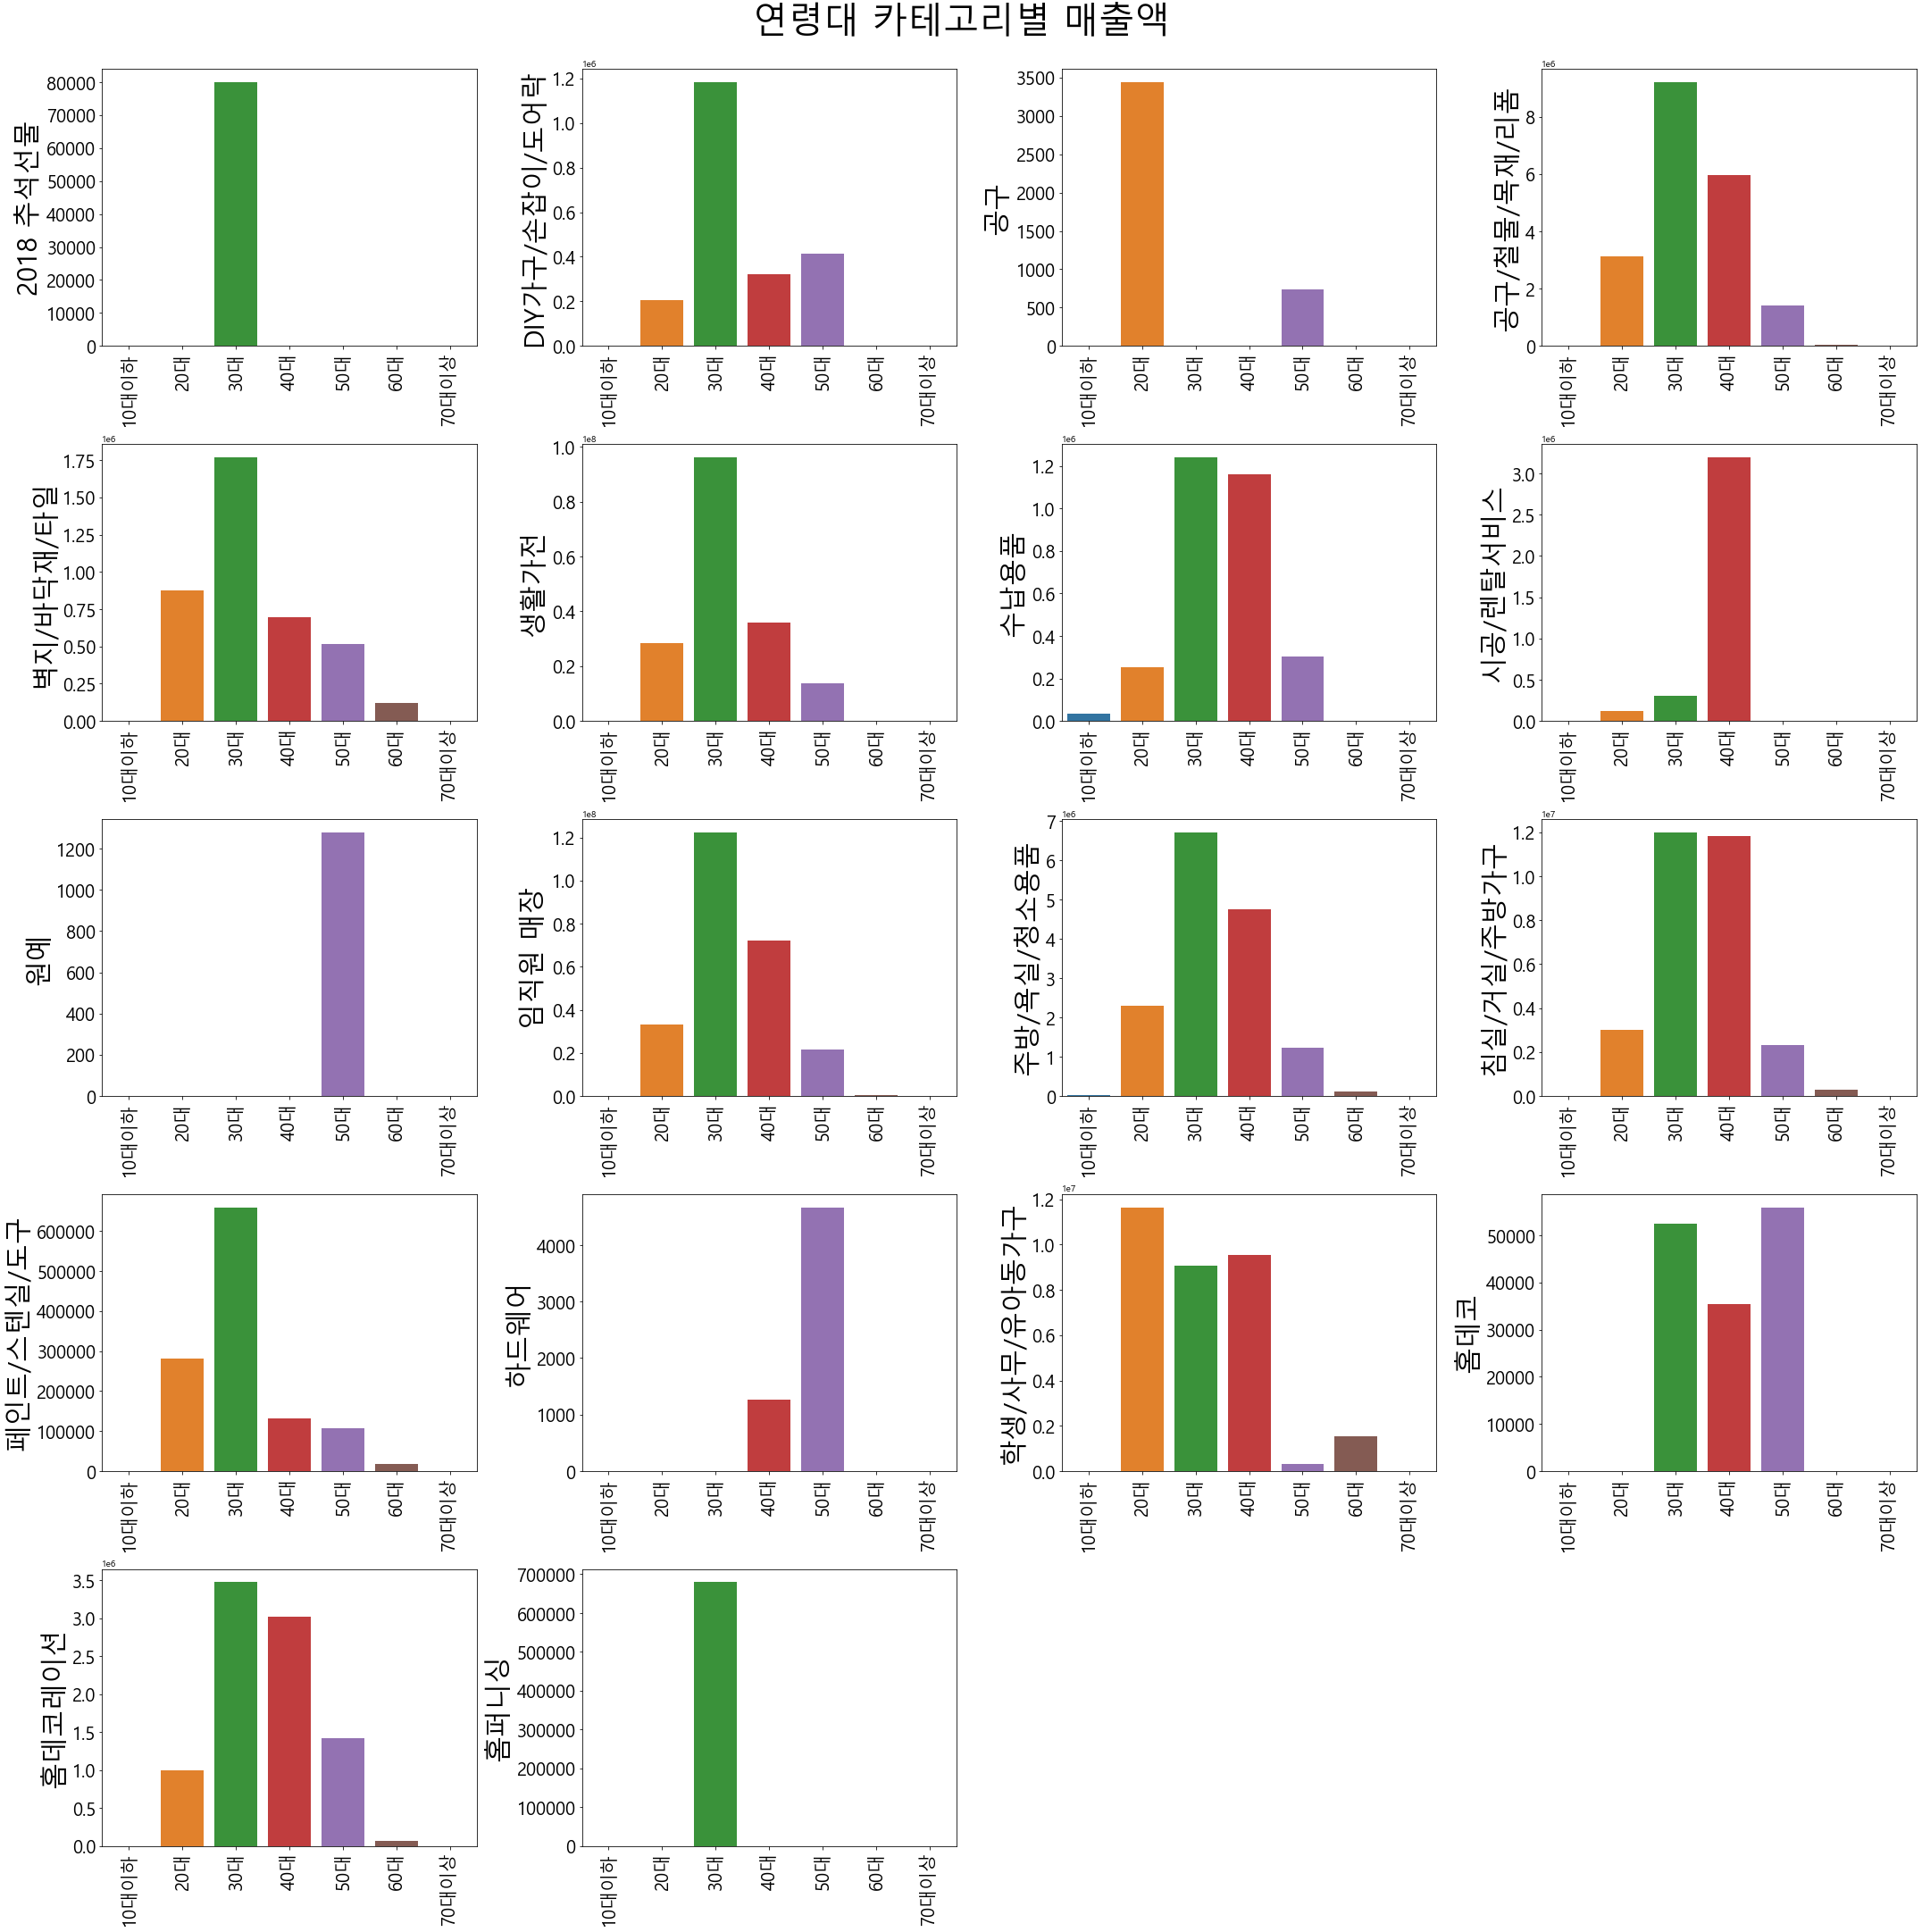

In [141]:
fig=plt.figure(figsize=(30,30))
for i,col in zip(range(1,19),df_AC.columns):
    plt.subplot(5,4,i)
    sns.barplot(data=df_AC,x=df_AC.index,y=df_AC[col],label=col)
    plt.xticks(rotation=90,size=20)
    plt.yticks(size=20)
    plt.xlabel('')
    plt.ylabel(col,size=30)
    
fig.suptitle('연령대 카테고리별 매출액',size=40,y=1)
plt.tight_layout()
plt.show()

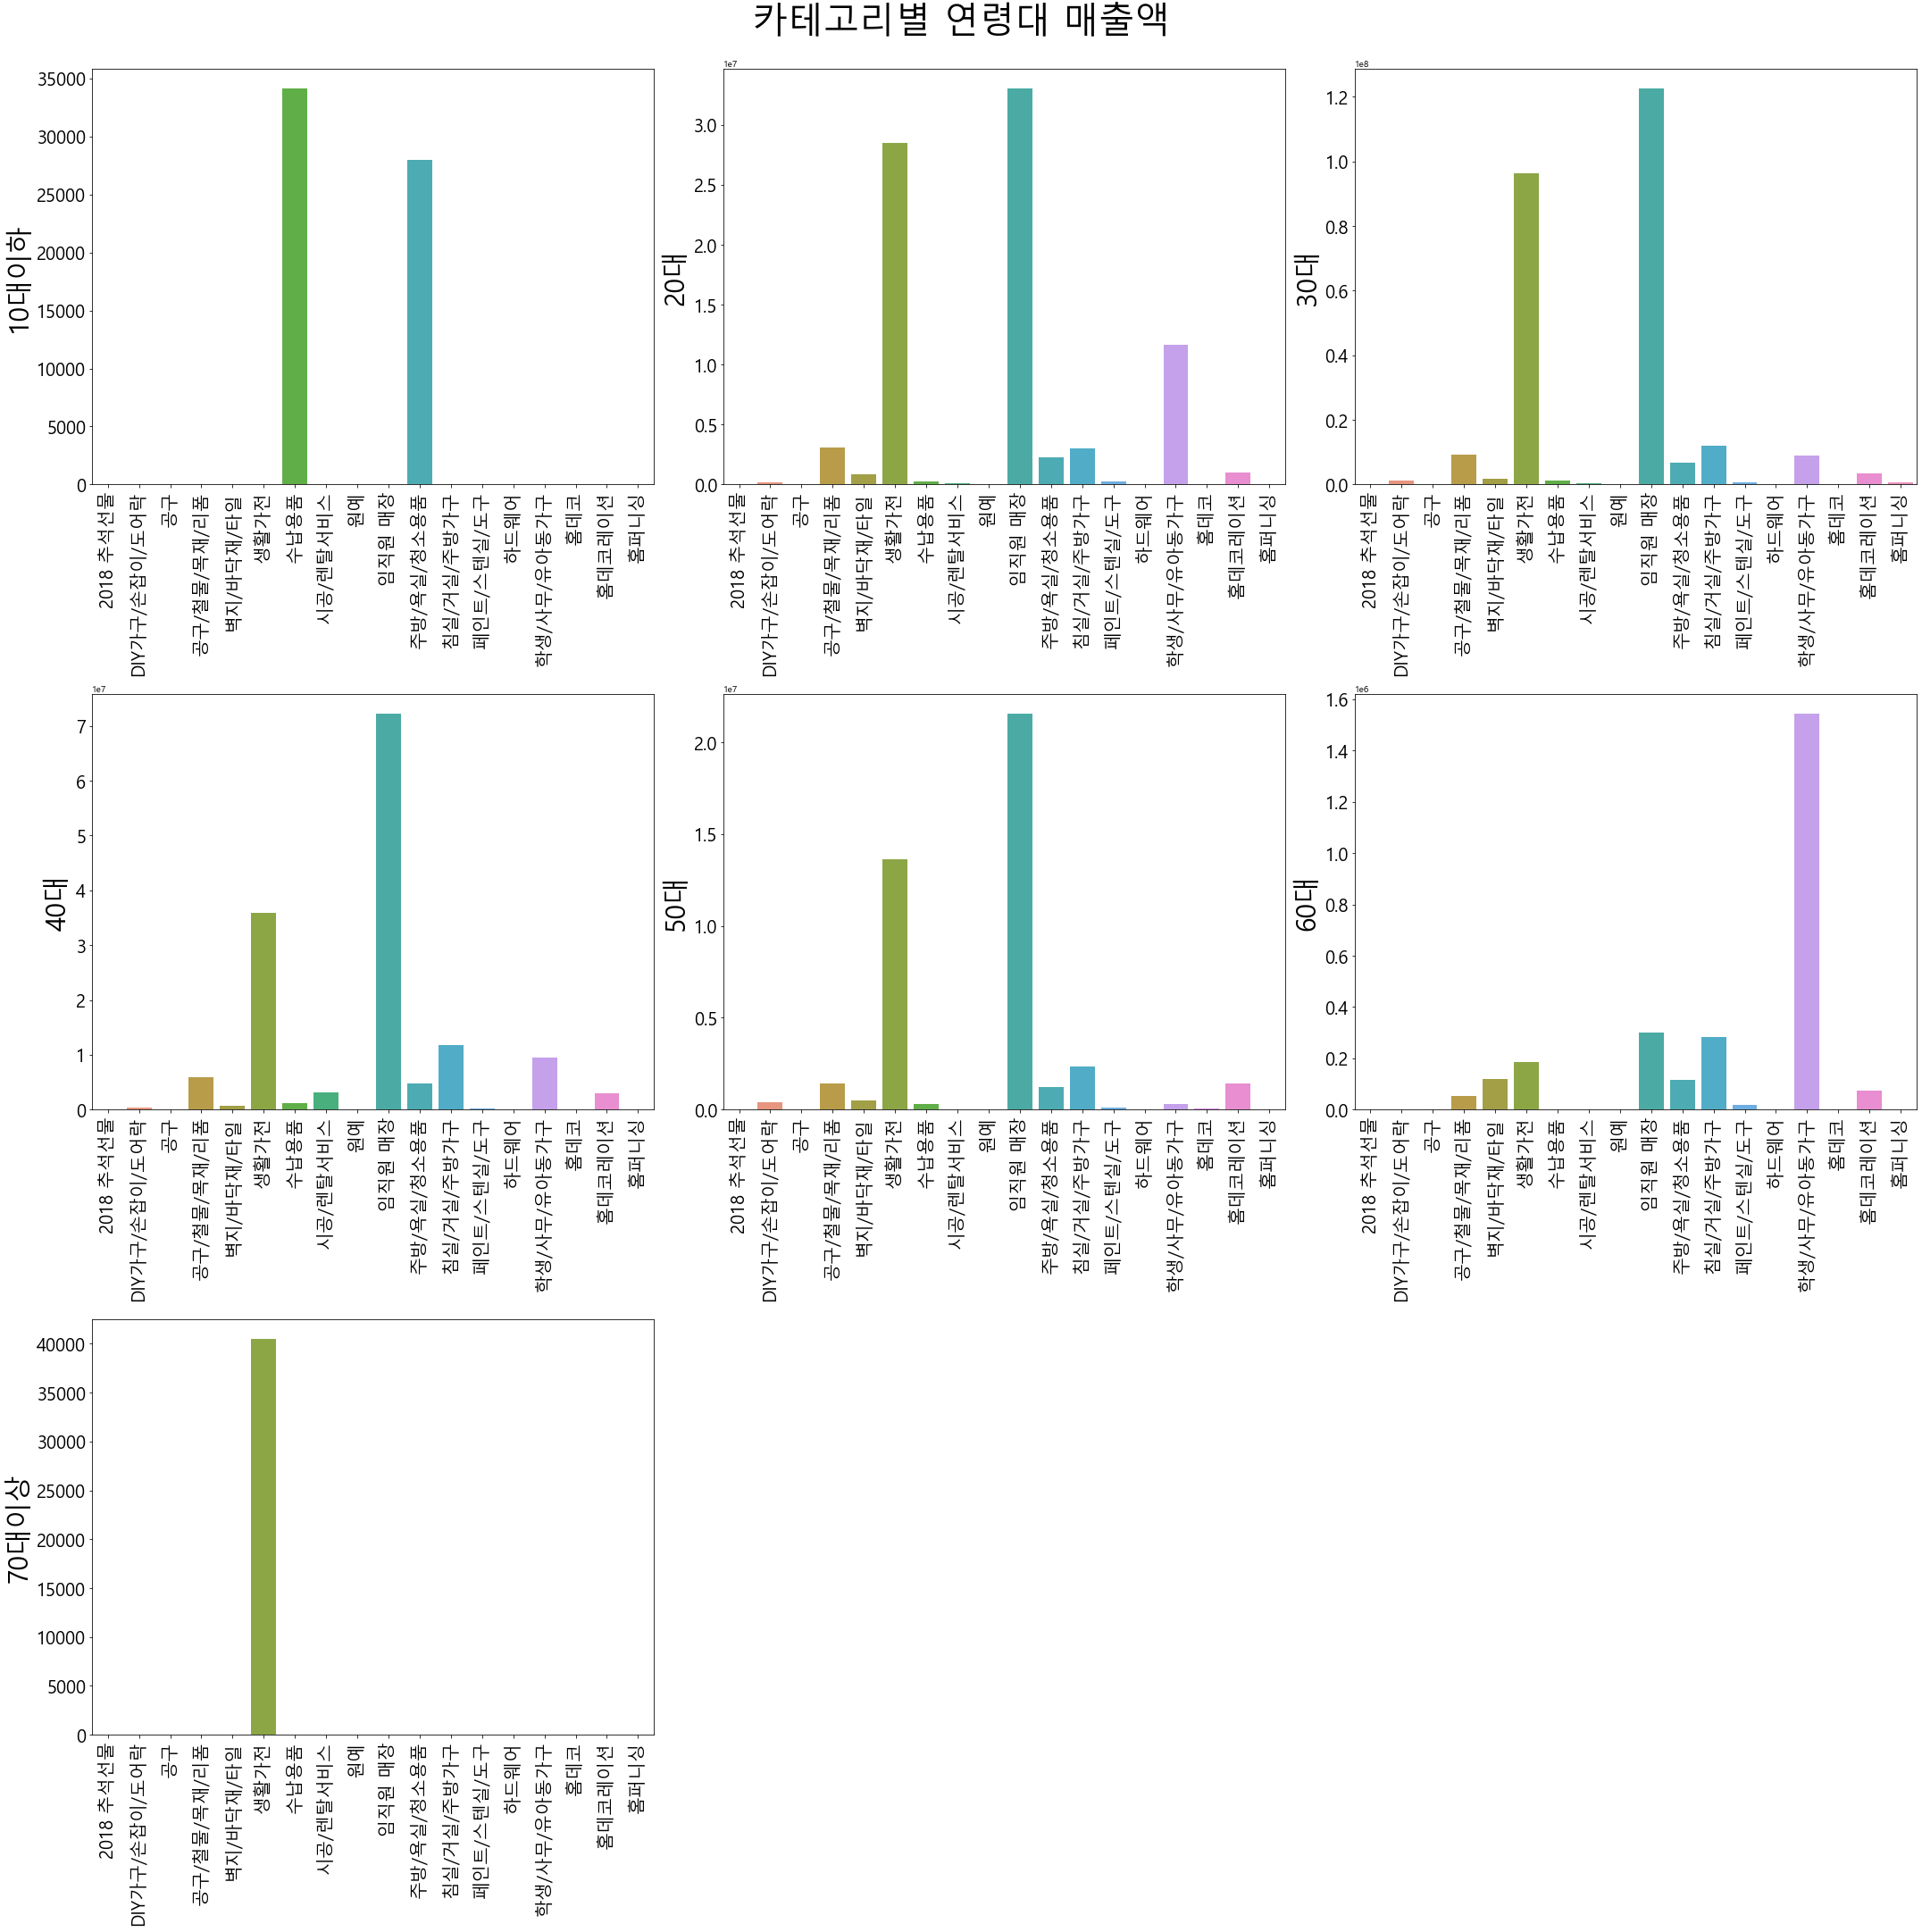

In [142]:
#보다 원활한 비교를 위해 카테고리 - 연령대 순으로도 재분류하여 집계 후 시각화.
df_CA=df_agecat.groupby(['카테고리명','연령대'],as_index=False).sum().pivot(index='카테고리명',columns='연령대',values='매출')

fig=plt.figure(figsize=(30,30))
for i,col in zip(range(1,8),df_CA.columns):
    plt.subplot(3,3,i)
    sns.barplot(data=df_CA,x=df_CA.index,y=df_CA[col],label=col)
    plt.xticks(rotation=90,size=20)
    plt.yticks(size=20)
    plt.xlabel('')
    plt.ylabel(col,size=30)
    
fig.suptitle('카테고리별 연령대 매출액',size=40,y=1)
plt.tight_layout()
plt.show()

# 제품 카테고리별, 업체별, 브랜드별 매출/판매량 분석

## 총매출 vs 카테고리,업체,브랜드
- LG, 닌텐도, 소니, 삼성의 생활가전제품이 매출에 가장 많이 기여.
- 단가가 높은 제품들
- 임직원 매장을 제외하면 공구/철물/목재/리폼 제품이 매출에 두번째로 기여.

In [143]:
df_sales['상품번호'].isin(df2_1['상품번호']).sum()

19092

In [144]:
df_sales['상품번호'].count() #매출 났지만 제품 리스트에 등록 안된 80개 제품

19161

In [145]:
df2_1['상품번호'].isin(df_sales['상품번호']).sum()

4462

In [146]:
df2_1['상품번호'].count() #총 제품군 중 매출이 난 제품은 고작 4764/110798*100%=4.3%

110798

In [147]:
df_salcat=pd.merge(df_sales[['상품번호','매출']],
                   df2_1[['상품번호','상품명','업체명','카테고리명','브랜드명']],
                   how='inner',on='상품번호') #불일치따위 무시한다 inner.

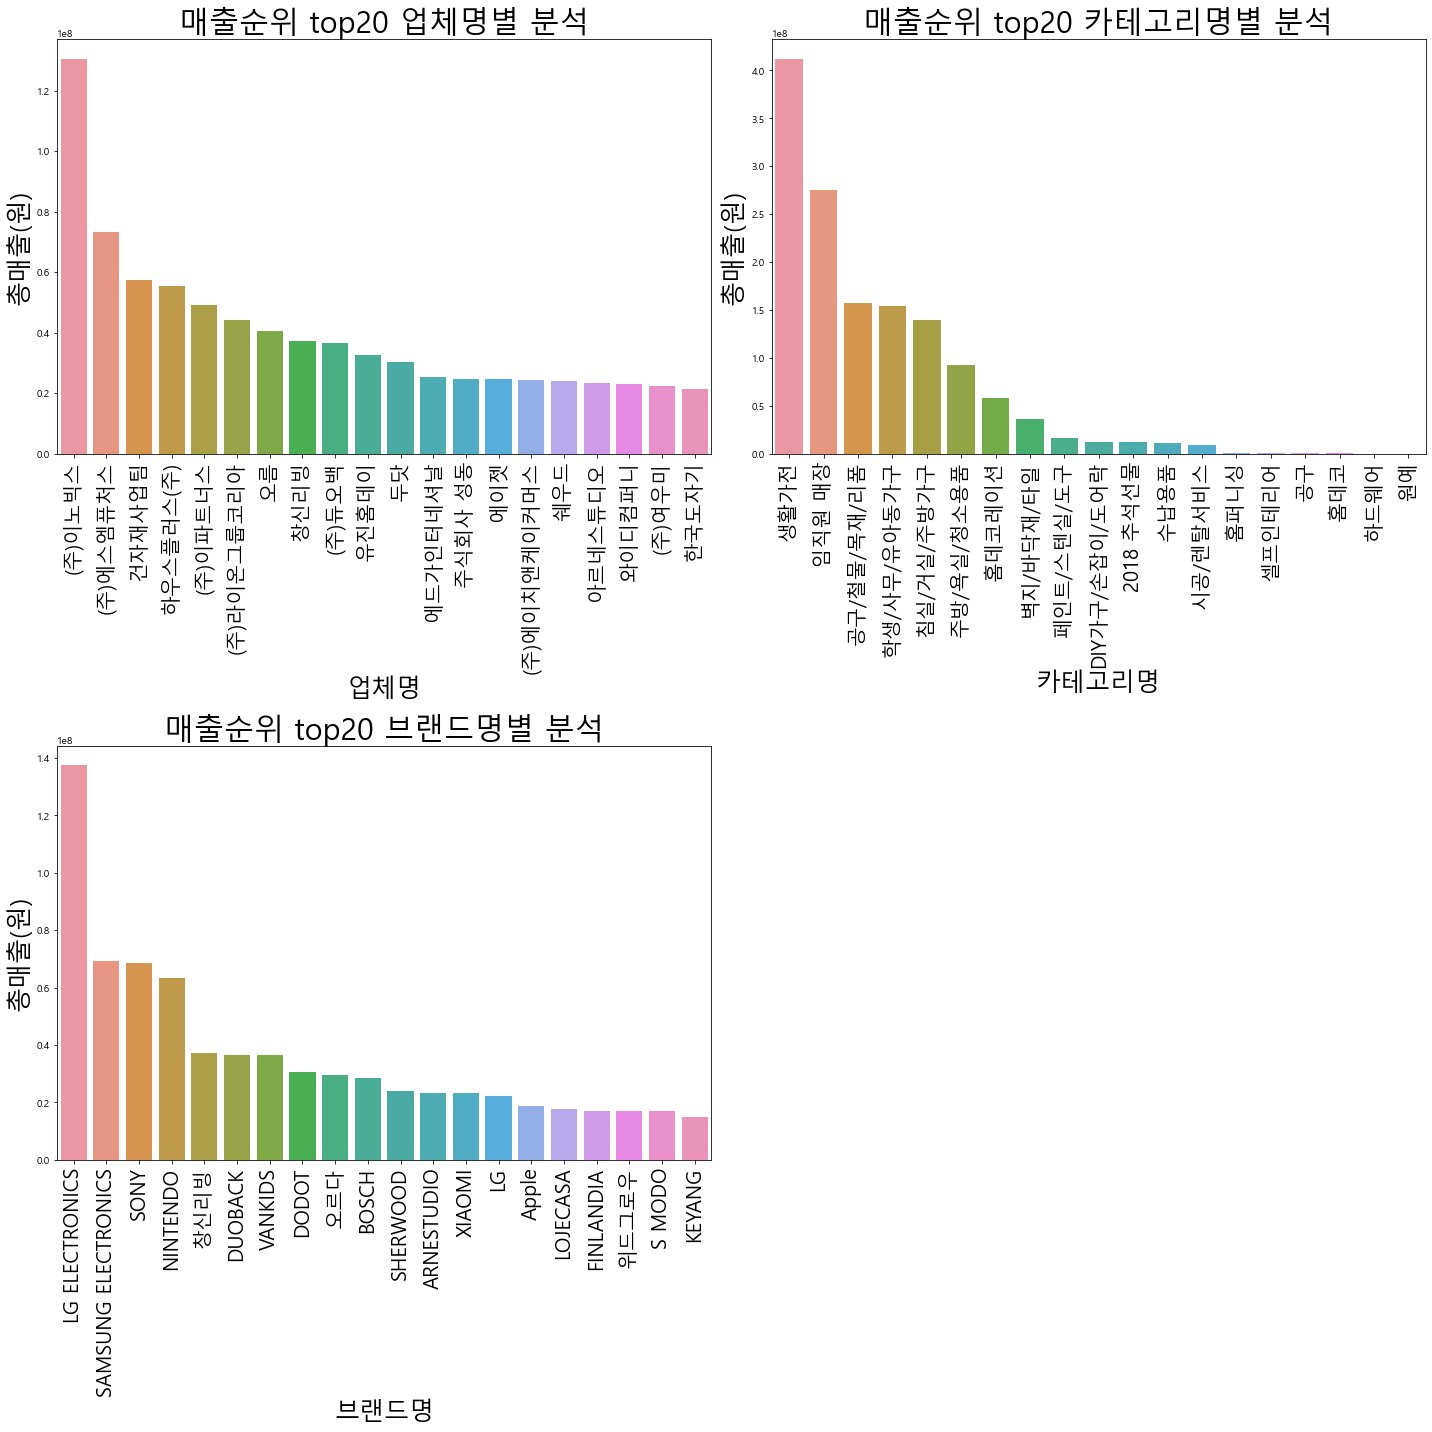

In [148]:
_interests=['업체명','카테고리명','브랜드명']

fig=plt.figure(figsize=(20,20))
for i,col in zip(range(1,5),_interests):
    plt.subplot(2,2,i)
    _graph=pd.DataFrame(df_salcat.groupby(col)['매출'].sum().sort_values(ascending=False).head(20)) #개쩐다 head의 재발견
    sns.barplot(data=_graph,x=_graph.index,y='매출')
    plt.xticks(rotation=90,size=20)
    plt.ylabel('총매출(원)',size=25)
    plt.xlabel(col,size=25)
    plt.title(f'매출순위 top20 {col}별 분석',size=30)
fig.tight_layout()
plt.show()

## 판매량 vs 카테고리,업체,브랜드
- 비싸진 않지만 거래량이 많은 제품 찾기
- 주방/욕실/청소용품이 거래량 가장 많지만 매출에 크게 기여하는 상품군이 아님.
- 매출 기여도와 판매량 모두 우수한 공구/철물/목재/리폼 제품과 생활가전 제품군에 집중 필요

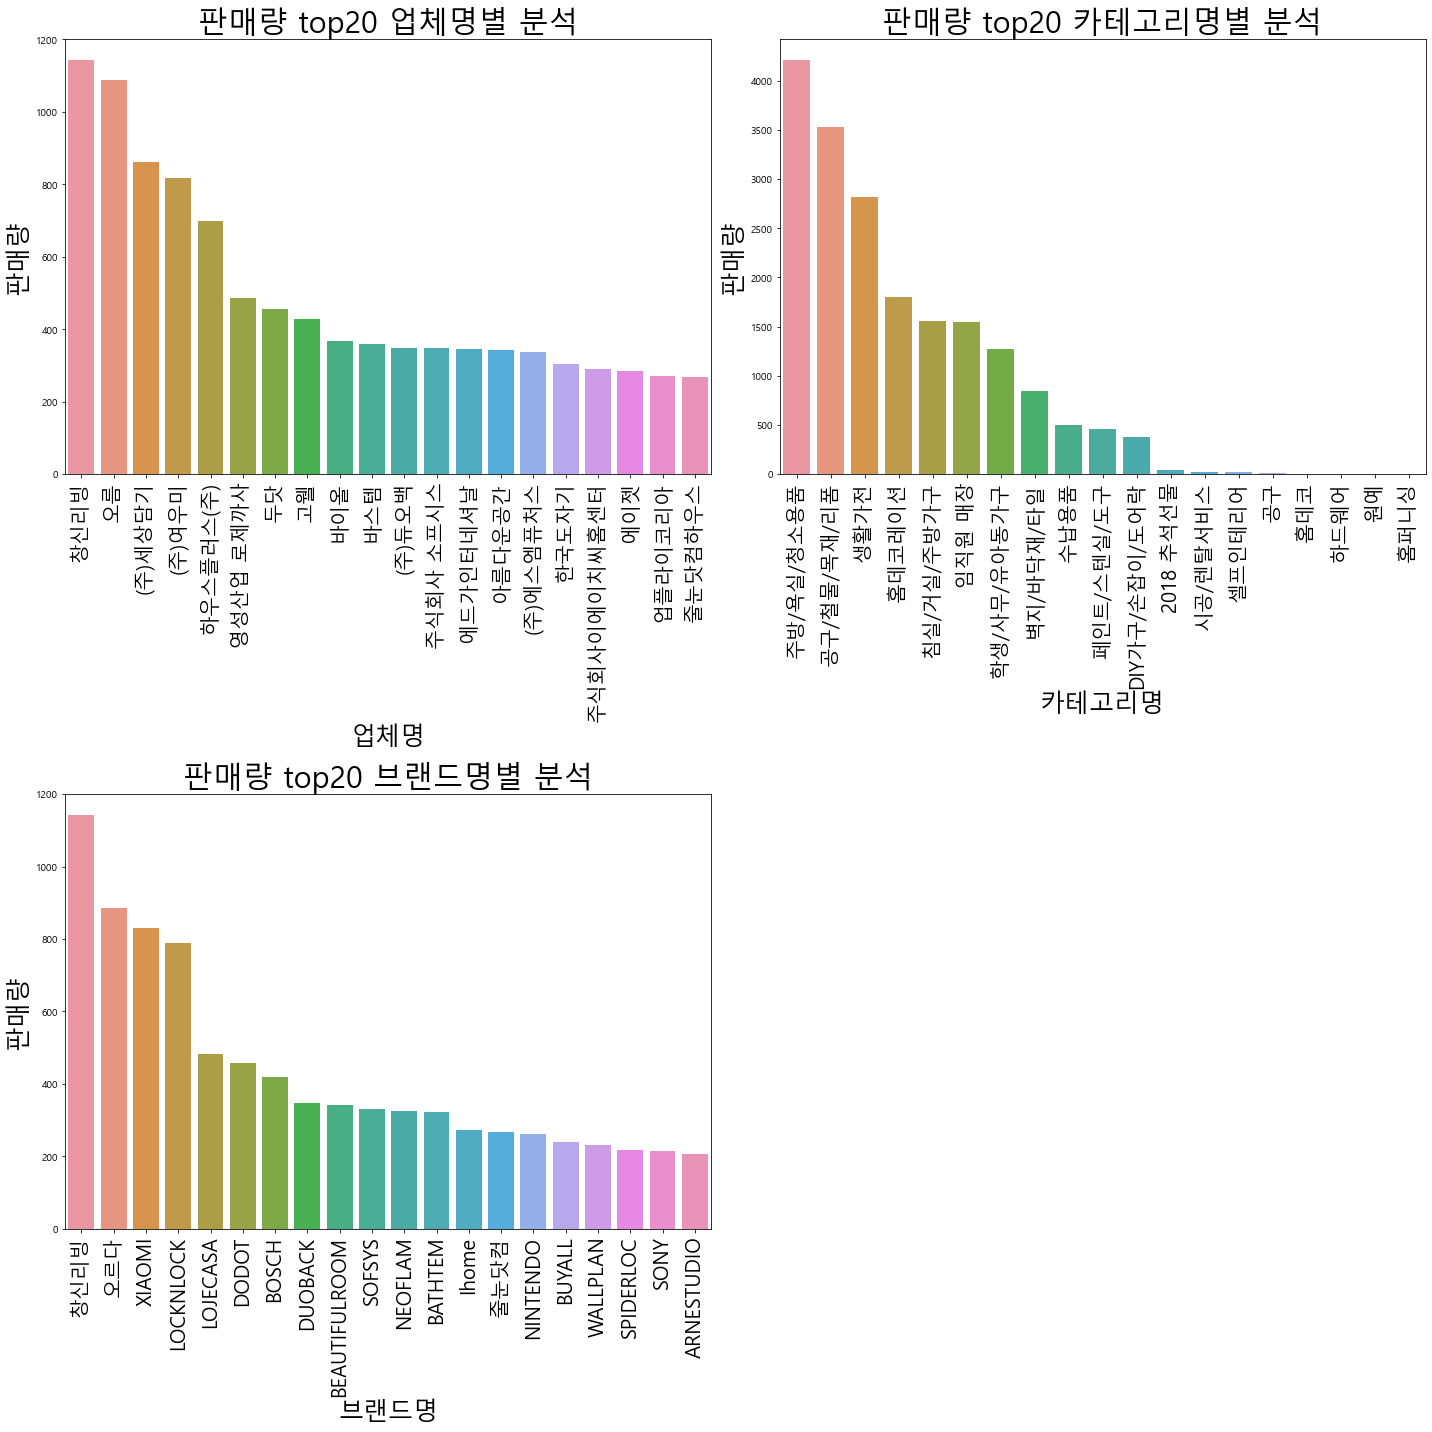

In [149]:
_interests=['업체명','카테고리명','브랜드명']

fig=plt.figure(figsize=(20,20))
for i,col in zip(range(1,5),_interests):
    plt.subplot(2,2,i)
    _graph=pd.DataFrame(df_salcat.groupby(col)['매출'].count().sort_values(ascending=False).head(20)) #개쩐다 head의 재발견
    sns.barplot(data=_graph,x=_graph.index,y='매출')
    plt.xticks(rotation=90,size=20)
    plt.ylabel('판매량',size=25)
    plt.xlabel(col,size=25)
    plt.title(f'판매량 top20 {col}별 분석',size=30)
fig.tight_layout()
plt.show()

# 회원 구분 (임원진, 일반) 관련 분석
- 임직원 및 일반 고객의 상품 구매율 비교분석

## 매출의 큰 비중을 차지하는 임직원 구매

<AxesSubplot:xlabel='진행구분', ylabel='count'>

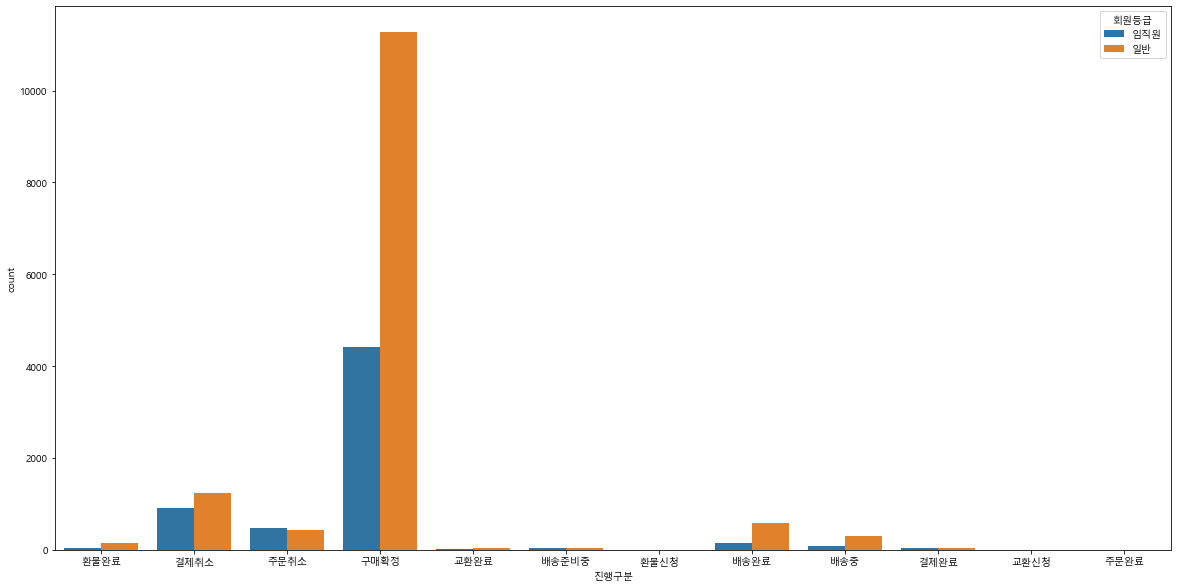

In [150]:
custom_1_merged = pd.merge(df3_1, df1_1, left_on = '회원번호', right_on = '회원번호',how = 'left')

plt.figure(figsize = [2_0,10])
sns.countplot(data=custom_1_merged, x='진행구분', hue='회원등급')
# plt.savefig(r'C:\Users\1000d\Desktop\알파코AI,API훈련과정\제출과제관련\프로젝트과제1\project1_images\savefig_default.png')
# 배송중, 배송완료 관련 설명 필요..

In [151]:
# 구매 확정의 수 = 매출 직결인데, 일반 대비 30% 이상의 비중으로 꽤나 높다.
# 따라서 선행적으로 임직원이 매출에 미치는 영향을 고려할 필요가 있다.

condition_confirm = custom_1_merged['진행구분'] == '구매확정'
custom_1_merge_confirm = custom_1_merged.loc[condition_confirm, :]


plt.figure(figsize = [20,10])
custom_1_merge_confirm.groupby('회원등급')['판매가'].sum()
# g=sns.barplot(data=custom_1_merge_confirm.groupby('회원등급')['판매가'].sum(),
#             x=custom_1_merge_confirm.groupby('회원등급')['판매가'].sum().index,
#             y=custom_1_merge_confirm.groupby('회원등급')['판매가'].sum().values)
# g.set(xticklabels=['임직원','일반'])
# plt.show()

회원등급
일반     967125928.0
임직원    622074792.0
Name: 판매가, dtype: float64

<Figure size 1440x720 with 0 Axes>

## 임직원 주문일 분석

회원등급                  일반    임직원
주문_year 주문_month               
2017    11           NaN  330.0
        12           7.0  249.0
2018    1            2.0  247.0
        2            9.0  296.0
        3          155.0   95.0
        4          270.0   70.0
        5         1243.0  162.0
        6         1062.0  356.0
        7         2247.0  578.0
        8         1981.0  583.0
        9         1957.0  904.0
        10        2325.0  542.0
        11          13.0   12.0


Text(0.5, 1.0, '임직원/일반회원 주문일 비교')

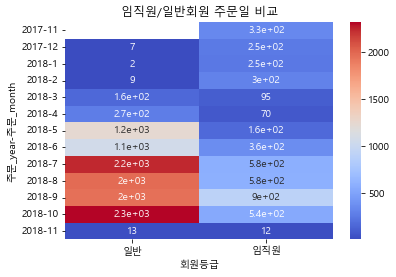

In [152]:
# 임직원 매출이 38%나 되므로 따로 구분할 필요성이 있다

# 임직원 가입일의 경우? 주문일의 경우?

custom_1_merge_confirm = custom_1_merge_confirm.astype({'주문일시':'datetime64','가입일':'datetime64'})

custom_1_merge_confirm['주문_month'] = custom_1_merge_confirm['주문일시'].apply(lambda x : x.month)
custom_1_merge_confirm['주문_year'] = custom_1_merge_confirm['주문일시'].apply(lambda x : x.year)
custom_1_merge_confirm['주문_ym'] = custom_1_merge_confirm['주문_year']+custom_1_merge_confirm['주문_month']*0.01

custom_1_merge_confirm = custom_1_merge_confirm.astype({'주문_ym':'str'})

# 회원 or 임직원의 가입월에 따른 주문수
custom_1_merged_date = custom_1_merge_confirm.groupby(['주문_year', '주문_month', '회원등급'])['주문일시'].count()

#pd.pivot_table(data=custom_1_merged, index = ''


custom_1_merged_date #구매건수

# plt.figure(figsize = [20,10])
# sns.pointplot(data=custom_1_merged_date, x='가입_ym', y= '판매가',hue='회원등급')




# 초기 임직원 매출의존도(판매액, 주문수)가 컸으나 점차 개선됨
# 7월 가입자 매출이 유별나게 높았고, 줄었다가 다시 10월까지 증가추세


#cu_merged0.to_excel('merged_oc_0.xlsx', sheet_name = 'new1')

#시각화 필요
print(custom_1_merged_date.unstack('회원등급')) #구매건수
#승종: 히트맵으로 시각화 해봤습니다. 표만 사용하셔도 무방
sns.heatmap(custom_1_merged_date.unstack('회원등급'),annot=True,cmap="coolwarm")
plt.title('임직원/일반회원 주문일 비교')

회원등급              일반          임직원
주문_ym                            
2017.11          NaN   25186848.0
2017.12     265490.0   47284374.0
2018.01      57900.0   32965287.0
2018.02     194000.0   54741412.0
2018.03   11201806.0   18478158.0
2018.04   18330729.0    9558918.0
2018.05   63439112.0   22536835.0
2018.06  119525981.0   80888377.0
2018.07  239670860.0   91520709.0
2018.08  150263130.0   81894259.0
2018.09  173367000.0  104473283.0
2018.1   189796220.0   51680262.0
2018.11    1013700.0     866070.0


Text(0.5, 1.0, '임직원/일반회원 판매가 비교')

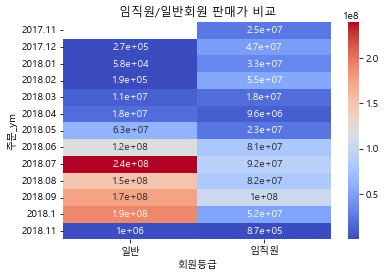

In [153]:
print(custom_1_merge_confirm.groupby(['주문_ym', '회원등급'])['판매가'].sum().unstack('회원등급'))
#승종: 히트맵으로 시각화 해봤습니다. 표만 사용하셔도 무방
sns.heatmap(custom_1_merge_confirm.groupby(['주문_ym', '회원등급'])['판매가'].sum().unstack('회원등급'),annot=True,cmap="coolwarm") 
plt.title('임직원/일반회원 판매가 비교')

회원등급              MRO       일반     임직원
가입_year 가입_month                      
2016    11        NaN      NaN     1.0
2017    11        NaN      4.0  1061.0
        12        NaN     36.0   132.0
2018    1         NaN     82.0   210.0
        2         2.0     45.0    62.0
        3         NaN  13979.0    24.0
        4         NaN  16212.0    13.0
        5         NaN   2084.0    57.0
        6         1.0   1517.0    38.0
        7         NaN   2934.0    48.0
        8         NaN   2742.0    91.0
        9         NaN   2439.0    53.0
        10        NaN   3727.0    22.0
        11        NaN   2671.0     1.0


Text(0.5, 1.0, '임직원/일반 회원수 변화 비교')

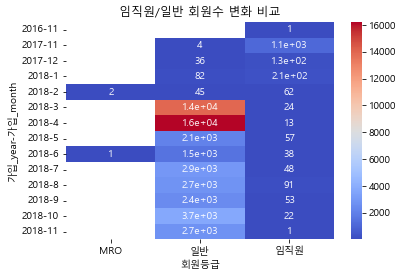

In [154]:
# 회원 수의 변화
_df1_1copy=df1_1.copy()
_df1_1copy = _df1_1copy.astype({'가입일':'datetime64'})

_df1_1copy['가입_month'] = _df1_1copy['가입일'].apply(lambda x : x.month)
_df1_1copy['가입_year'] = _df1_1copy['가입일'].apply(lambda x : x.year)

_df1_1copy.groupby(['가입_year', '가입_month', '회원등급'])['회원번호'].count()

# 임직원은 2017.11 가입이 대부분, 이후 2달간은 좀 있지만, 이후 100명 이하 / 전체 회원 수 대비 영향 미미
# 2018년 3,4 월에 일반 가입자수가 급격히 증가 =  이벤트 등 뭔가 있다.
# 이떄 이후 매출도 급상승하기 시작함. 뭔가 프로모션이 먹혔다고 볼 수 있다.

print(_df1_1copy.groupby(['가입_year', '가입_month', '회원등급'])['회원번호'].count().unstack('회원등급'))
#승종: 히트맵으로 시각화 해봤습니다. 표만 사용하셔도 무방
sns.heatmap(_df1_1copy.groupby(['가입_year', '가입_month', '회원등급'])['회원번호'].count().unstack('회원등급'),annot=True,cmap="coolwarm") 
plt.title('임직원/일반 회원수 변화 비교')

## 임직원/일반인 제품카테고리별 선호도 분석
- 판매액, 판매수 모두 유의미한 차이는 없다. 사장의 강매 등은 없었던 것으로 보여진다.
- 카테고리 분석시, 임직원 매장 데이터 정보만 분리하면 문제될 것 없음

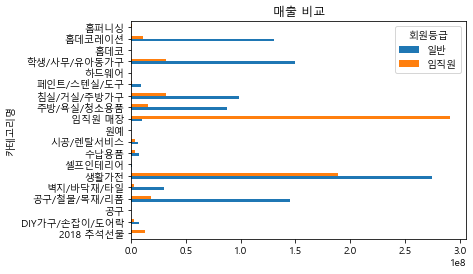

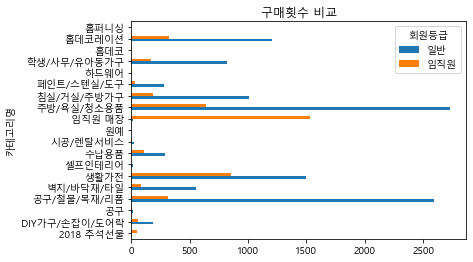

In [155]:
# 임직원 / 일반인 카테고리별 선호도가 다른가?

# 불러오기
# df_2_1 = pd.read_excel('project1_data/2.1 상품정보_추출.xlsx')

# 결합 3_1
custom_1_merged__confirm_pro = pd.merge(custom_1_merge_confirm, df2_1, left_on = '상품번호', right_on = '상품번호',how = 'left')

# 카테고리별 매출 비교 (일반/임직원)
custom_1_merged__confirm_pro.groupby(['카테고리명','회원등급'])['판매가'].sum().unstack().plot(kind='barh')
plt.title('매출 비교')

custom_1_merged__confirm_pro.groupby(['카테고리명','회원등급'])['주문일시'].count().unstack().plot(kind='barh')
plt.title('구매횟수 비교')

plt.show()

# 판매액, 판매수 모두 유의미한 차이는 없다. 사장의 강매 등은 없었던 것으로 보여진다.
# 카테고리 분석시, 임직원 매장 데이터 정보만 분리하면 문제될 것 없음

# 지역별 카테고리,업체,브랜드 선호도
- 매출 기여도와 거래량이 높은 제품군, 업체, 브랜드를 지역별로 분석

## 전처리

In [156]:
df3_1['배송지'].str.split(' ').str[0].unique()
# null값 존재
# '호계e편한세상아파트','102*301' 등 주소를 특이하게 쓰시는 분들 존재
# '서울시','서울','서울특별시' 등 같은 시,도를 의미하는 다른 말들 존재

array(['서울', '경기', '강원', '인천', '세종특별자치시', '전남', '대전', '충남', '광주', '경기도',
       '경남', '전북', '충북', '경북', '부산', nan, '대구', '울산', '서울특별시', '인천광역시',
       '제주특별자치도', '호계e편한세상아파트', '전라북도', '라도무스', '죽전벽산5단지', '테헤란로',
       '102*301', '서울시', '대구광역시'], dtype=object)

In [157]:
df3_1['배송지'].isnull().sum()

64

In [158]:
#배송지 결측 다 삭제
df3_1copy=df3_1.copy()
df3_1copy=df3_1copy[df3_1copy['배송지'].isnull()==False]

In [159]:
df3_1copy['배송지'].isnull().sum()

0

In [160]:
# 이상값 삭제
wronglist=['호계e편한세상아파트', '라도무스', '죽전벽산5단지', '테헤란로',
       '102*301']
df3_1copy = df3_1copy[~df3_1copy['배송지'].str.split(' ').str[0].isin(wronglist)]

In [161]:
# 시,도 column
df3_1copy['시도']=df3_1copy['배송지'].str.split(' ').str[0]

In [162]:
# 같은의미 다른값 통일
df3_1copy['시도']=df3_1copy['시도'].replace({'경기도':'경기','대구광역시':'대구','서울특별시':'서울','서울시':'서울','인천광역시':'인천','전라북도':'전북','세종특별자치시':'세종시','제주특별자치도':'제주도'})

### 지역별 주문 횟수

In [163]:
pd.DataFrame(df3_1copy.groupby('시도')['회원번호'].count()).T

시도,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종시,울산,인천,전남,전북,제주도,충남,충북
회원번호,582,6863,991,707,517,726,580,1213,8020,171,341,1494,414,532,149,829,556


In [164]:
df3_1copy.groupby('시도')['회원번호'].count().index

Index(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종시', '울산', '인천',
       '전남', '전북', '제주도', '충남', '충북'],
      dtype='object', name='시도')

In [165]:
df_3location=df3_1copy[['상품번호','시도']]
df_2category=df2_1[['상품번호','카테고리명','상품명','브랜드명','업체명']]

df_3location['상품번호'].isin(df_2category['상품번호']).sum()

24439

In [166]:
df_3location['상품번호'].count() #판매내역 있는 제품 중 246종 제품 리스트에 등록 안됨.

24685

In [167]:
df_2category['상품번호'].isin(df_3location['상품번호']).sum()

5501

In [168]:
df_2category['상품번호'].count() #총 제품군 중 판매내역 있는 제품은 5501/110798*100%=4.96%

110798

In [169]:
df_3loc_2cat=pd.merge(df_3location,df_2category,how='inner',on='상품번호')  #걍 inner로 다 자름.

In [170]:
df_3loc_2cat['카테고리명'].unique() #널 확인

array(['임직원 매장', '공구/철물/목재/리폼', '페인트/스텐실/도구', '주방/욕실/청소용품', '벽지/바닥재/타일',
       '학생/사무/유아동가구', '홈데코레이션', '침실/거실/주방가구', 'DIY가구/손잡이/도어락', '생활가전',
       '수납용품', '셀프인테리어', '홈퍼니싱', '시공/렌탈서비스', nan, '하드웨어', '공구', '원예',
       '홈데코', '2018 추석선물'], dtype=object)

In [171]:
df_3loc_2cat.isnull().sum() #결측치 방치

상품번호       0
시도         0
카테고리명     40
상품명        0
브랜드명     685
업체명        2
dtype: int64

In [172]:
df_result=df_3loc_2cat.groupby(['시도','카테고리명'],as_index=False).count().pivot(index='시도',columns='카테고리명',values='상품번호') #다 하고 보니까 비교대상 둘다 항목형이네.
df_result
###지역별 카테고리별 구매횟수

카테고리명,2018 추석선물,DIY가구/손잡이/도어락,공구,공구/철물/목재/리폼,벽지/바닥재/타일,생활가전,셀프인테리어,수납용품,시공/렌탈서비스,원예,임직원 매장,주방/욕실/청소용품,침실/거실/주방가구,페인트/스텐실/도구,하드웨어,학생/사무/유아동가구,홈데코,홈데코레이션,홈퍼니싱
시도,,,,,,,,,,,,,,,,,,,
강원,NaN,4.0,7.0,110.0,25.0,91.0,NaN,22.0,NaN,NaN,12.0,138.0,45.0,14.0,1.0,47.0,NaN,66.0,NaN
경기,1.0,131.0,6.0,1395.0,333.0,1025.0,10.0,201.0,19.0,NaN,486.0,1401.0,521.0,161.0,1.0,444.0,NaN,690.0,NaN
경남,NaN,16.0,NaN,224.0,63.0,100.0,1.0,28.0,NaN,NaN,43.0,219.0,82.0,27.0,NaN,74.0,NaN,113.0,NaN
경북,NaN,18.0,NaN,145.0,40.0,81.0,NaN,28.0,NaN,NaN,46.0,149.0,53.0,18.0,NaN,61.0,NaN,65.0,1.0
광주,NaN,7.0,NaN,98.0,47.0,63.0,2.0,9.0,NaN,NaN,27.0,126.0,35.0,12.0,NaN,31.0,NaN,57.0,NaN
대구,NaN,21.0,NaN,130.0,39.0,98.0,1.0,27.0,NaN,NaN,4.0,179.0,57.0,31.0,NaN,56.0,NaN,82.0,NaN
대전,NaN,7.0,NaN,103.0,24.0,88.0,NaN,16.0,1.0,NaN,18.0,141.0,60.0,29.0,NaN,35.0,NaN,52.0,NaN
부산,NaN,16.0,NaN,239.0,109.0,202.0,2.0,34.0,1.0,NaN,53.0,250.0,102.0,26.0,NaN,56.0,NaN,120.0,NaN
서울,44.0,185.0,4.0,1275.0,385.0,1247.0,8.0,213.0,14.0,3.0,871.0,1566.0,610.0,206.0,4.0,501.0,8.0,673.0,NaN


<AxesSubplot:xlabel='시도', ylabel='DIY가구/손잡이/도어락'>

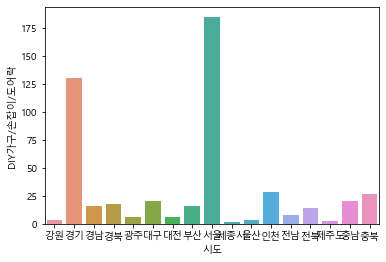

In [173]:
# DIY가구 판매량 시각화. 서울과 경기도만 엄청 높은 거래량.
sns.barplot(data=df_result,x=df_result.index,y=df_result['DIY가구/손잡이/도어락'])

## 한국 시,도별 총 인구수로 normalization
- 인구수가 많은 서울, 경기도는 당연히 판매량 많을 것.
- 시,도별 총 인구수로 나눠 판매량 평준화

### 대한민국 주민등록 인구 전처리

In [174]:
#https://jumin.mois.go.kr/index.jsp#
df_pop=pd.read_csv('./data/201711_201811_주민등록인구및세대현황_월간.csv',encoding='cp949')

In [175]:
#각 데이터간 시,도 갯수 17개로 동일
df_pop[df_pop['행정구역'].str.contains('00000000')].count()

행정구역                17
2017년11월_거주자 인구수    17
2017년11월_세대수        17
2017년11월_세대당 인구     17
2017년11월_남자 인구수     17
                    ..
2018년11월_세대수        17
2018년11월_세대당 인구     17
2018년11월_남자 인구수     17
2018년11월_여자 인구수     17
2018년11월_남여 비율      17
Length: 79, dtype: int64

In [176]:
df_result.count() #17개 시,도. 위 데이터와 같다.

카테고리명
2018 추석선물         2
DIY가구/손잡이/도어락    17
공구                4
공구/철물/목재/리폼      17
벽지/바닥재/타일        17
생활가전             17
셀프인테리어           10
수납용품             17
시공/렌탈서비스          5
원예                1
임직원 매장           16
주방/욕실/청소용품       17
침실/거실/주방가구       17
페인트/스텐실/도구       17
하드웨어              3
학생/사무/유아동가구      17
홈데코               1
홈데코레이션           17
홈퍼니싱              1
dtype: int64

In [177]:
#전처리 숫자제거
df_pop=df_pop[df_pop['행정구역'].str.contains('00000000')]
df_pop['행정구역'].str.split(' ').str[0]

0        서울특별시
26       부산광역시
43       대구광역시
52       인천광역시
64       광주광역시
70       대전광역시
76       울산광역시
82     세종특별자치시
84         경기도
133        강원도
152       충청북도
168       충청남도
186       전라북도
203       전라남도
226       경상북도
252       경상남도
276    제주특별자치도
Name: 행정구역, dtype: object

In [178]:
#이름 동일하게 변경
for i in df_pop['행정구역']:
    if len(i.split(' ')[0])==5 or len(i.split(' ')[0])==3:
        df_pop['행정구역'].replace(i,i.split(' ')[0][:2],inplace=True)
    elif len(i.split(' ')[0])==4:
        df_pop['행정구역'].replace(i,i.split(' ')[0][:3:2],inplace=True)

In [179]:
df_pop['행정구역'].replace({'세종특별자치시  (3600000000)':'세종시','제주특별자치도  (5000000000)':'제주도'},inplace=True)

In [180]:
df_pop=df_pop[['행정구역','2018년11월_거주자 인구수']]

In [181]:
df_pop.columns=[['시도','인구수']]

In [182]:
# index='시도'
### 이거 도저히 이해안됨. (서울,) (시도,)
df_pop_test=df_pop.copy()
# df_pop_test.index=range(17)
# df_pop_test['시도'].squeeze()
df_pop_test.index=df_pop_test['시도'].squeeze()
df_pop_test.T #시,도별 인구수
# df_pop_test.to_csv('./filename.csv',encoding='cp949')

"(시도,)",서울,부산,대구,인천,광주,대전,울산,세종시,경기,강원,충북,충남,전북,전남,경북,경남,제주도
시도,서울,부산,대구,인천,광주,대전,울산,세종시,경기,강원,충북,충남,전북,전남,경북,경남,제주도
인구수,"9,605,712","3,407,011","2,445,303","2,925,479","1,451,928","1,480,993","1,150,113","311,024","12,947,195","1,529,980","1,587,972","2,111,107","1,826,112","1,868,874","2,659,579","3,355,005","661,508"


In [183]:
df_pop_test.columns #컬럼명은 왜인지 아직 tuple

MultiIndex([( '시도',),
            ('인구수',)],
           )

In [184]:
#인구수 int
df_pop_test[('인구수',)]=df_pop_test[('인구수',)].str.replace(',','')

In [185]:
df_pop_test[('인구수',)]=df_pop_test[('인구수',)].astype('int64')

In [186]:
df_3loc_2cat.groupby(['시도','카테고리명'],as_index=False).count() #213 rows

,시도,카테고리명,상품번호,상품명,브랜드명,업체명
0,강원,DIY가구/손잡이/도어락,4,4,4,4
1,강원,공구,7,7,7,7
2,강원,공구/철물/목재/리폼,110,110,110,110
3,강원,벽지/바닥재/타일,25,25,25,25
4,강원,생활가전,91,91,91,91
...,...,...,...,...,...,...
208,충북,주방/욕실/청소용품,115,115,113,115
209,충북,침실/거실/주방가구,49,49,49,49
210,충북,페인트/스텐실/도구,28,28,28,28
211,충북,학생/사무/유아동가구,21,21,20,21


In [187]:
# 시,도별 판매량/시,도별 총인구수*10000000
df_group=df_3loc_2cat.groupby(['시도','카테고리명'],as_index=False).count()
df_group['norm']=[df_group.iloc[i][2]/df_pop_test.loc[df_group.iloc[i][0]][1]*10000000 for i in range(213)]

In [188]:
df_regcatvis=df_group.pivot(index='시도',columns='카테고리명',values='norm')
df_regcatvis

카테고리명,2018 추석선물,DIY가구/손잡이/도어락,공구,공구/철물/목재/리폼,벽지/바닥재/타일,생활가전,셀프인테리어,수납용품,시공/렌탈서비스,원예,임직원 매장,주방/욕실/청소용품,침실/거실/주방가구,페인트/스텐실/도구,하드웨어,학생/사무/유아동가구,홈데코,홈데코레이션,홈퍼니싱
시도,,,,,,,,,,,,,,,,,,,
강원,NaN,26.144133,45.752232,718.963647,163.400829,594.779017,NaN,143.792729,NaN,NaN,78.432398,901.972575,294.121492,91.504464,6.536033,307.193558,NaN,431.378188,NaN
경기,0.772368,101.180217,4.634208,1077.453456,257.198567,791.677271,7.723681,155.245982,14.674993,NaN,375.370881,1082.087665,402.403764,124.351259,0.772368,342.931423,NaN,532.933968,NaN
경남,NaN,47.689944,NaN,667.659214,187.779154,298.062149,2.980621,83.457402,NaN,NaN,128.166724,652.756106,244.410962,80.476780,NaN,220.565990,NaN,336.810228,NaN
경북,NaN,67.679885,NaN,545.199071,150.399744,304.559481,NaN,105.279821,NaN,NaN,172.959705,560.239045,199.279660,67.679885,NaN,229.359609,NaN,244.399584,3.759994
광주,NaN,48.211757,NaN,674.964599,323.707512,433.905814,13.774788,61.986545,NaN,NaN,185.959634,867.811627,241.058785,82.648726,NaN,213.509210,NaN,392.581450,NaN
대구,NaN,85.878928,NaN,531.631458,159.489438,400.768330,4.089473,110.415764,NaN,NaN,16.357891,732.015623,233.099947,126.773655,NaN,229.010474,NaN,335.336766,NaN
대전,NaN,47.265585,NaN,695.479317,162.053433,594.195921,NaN,108.035622,6.752226,NaN,121.540075,952.063919,405.133583,195.814565,NaN,236.327923,NaN,351.115772,NaN
부산,NaN,46.961985,NaN,701.494653,319.928524,592.895063,5.870248,99.794218,2.935124,NaN,155.561576,733.781018,299.382655,76.313226,NaN,164.366948,NaN,352.214889,NaN
서울,45.806079,192.593740,4.164189,1327.335236,400.803189,1298.185913,8.328378,221.743063,14.574661,3.123142,906.752149,1630.279983,635.038819,214.455732,4.164189,521.564669,8.328378,700.624795,NaN


## 지역별 제품카테고리별 판매량 시각화

### 평준화 이전 판매량 시각화
- 서울 막대기 보여주기

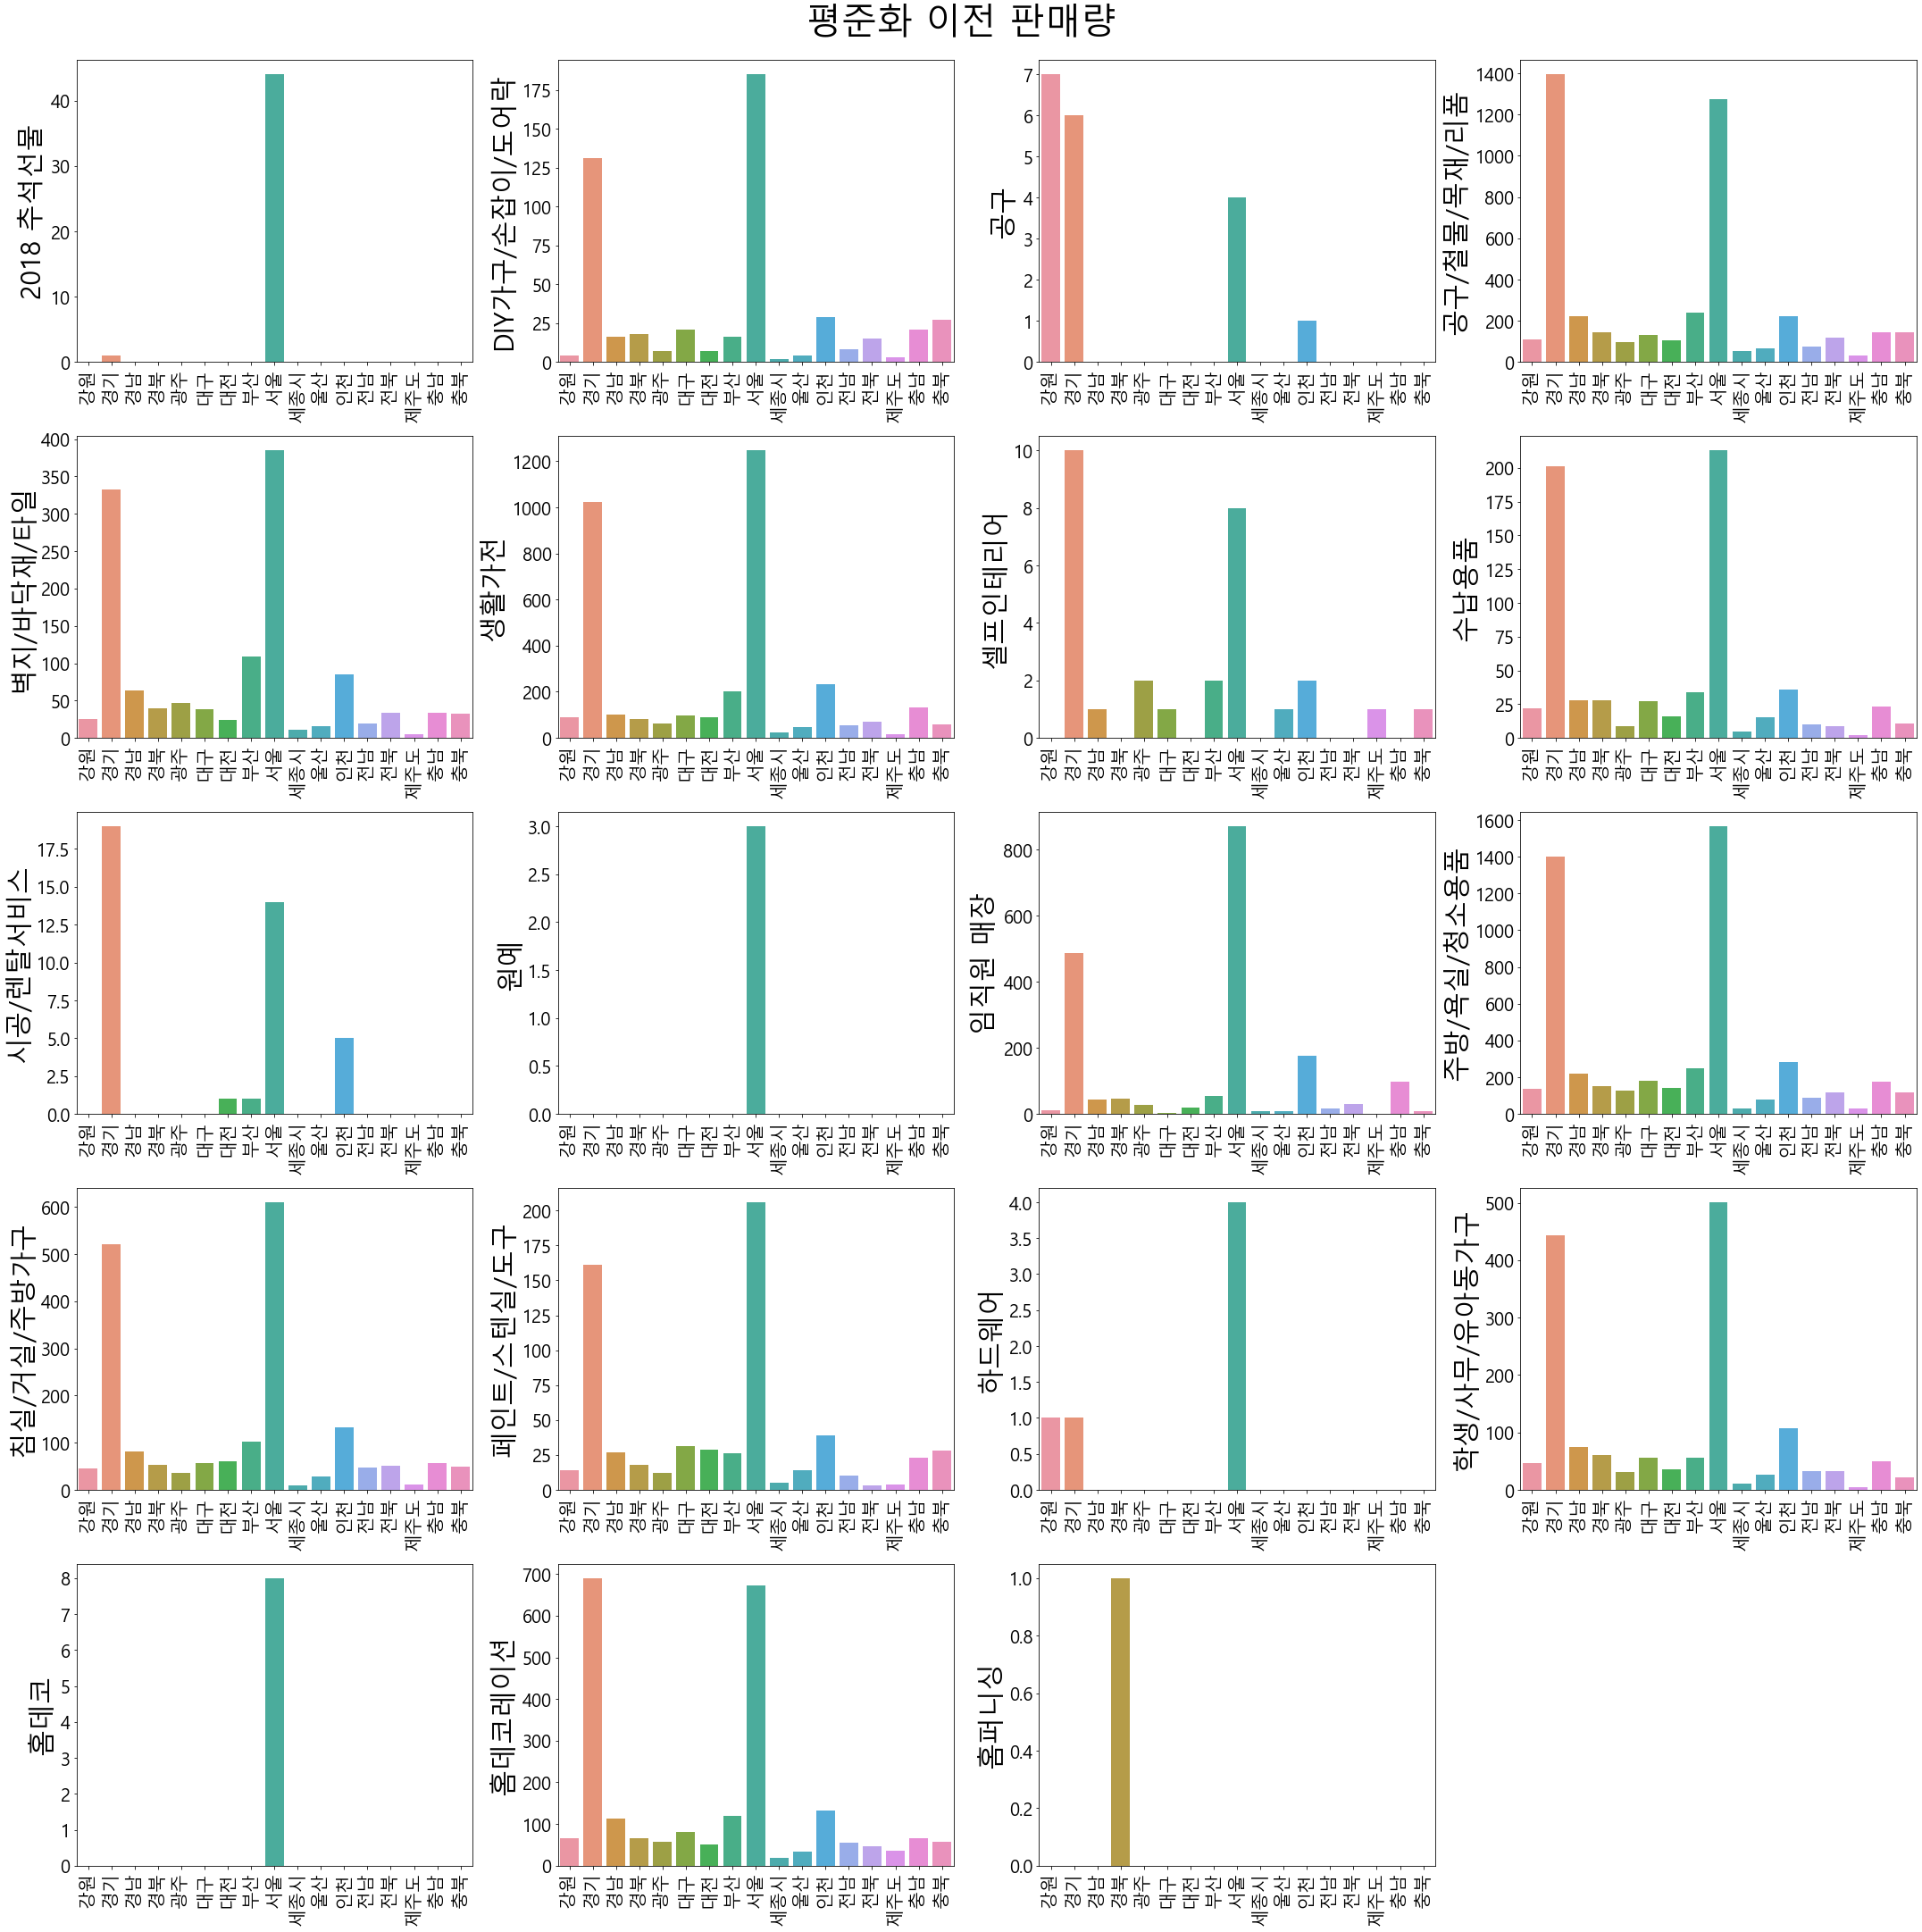

In [189]:
fig=plt.figure(figsize=(30,30))
for i,col in zip(range(1,20),df_result.columns):
    plt.subplot(5,4,i)
    sns.barplot(data=df_result,x=df_result.index,y=df_result[col],label=col)
    plt.xticks(rotation=90,size=20)
    plt.yticks(size=20)
    plt.xlabel('')
    plt.ylabel(col,size=30)
    
fig.suptitle('평준화 이전 판매량',size=40,y=1)
plt.tight_layout()
plt.show()

### 평준화 이후 카테고리별 판매량
- 매출1위 판매량3위 였던 생활가전 은 수도권에서 많이 구매.
- 매출2위 판매량2위 였던 공구/철물/목재/리폼 은 세종시에서 인구대비 많은 고객들이 구매.
    - 당시 세종특별시의 개발이 영향을 미쳤으리라 예상.
    - 세종시에 공구/철물/목제/리폼 제품을 효과적으로 전달하면 매출이 상승할 것으로 기대.

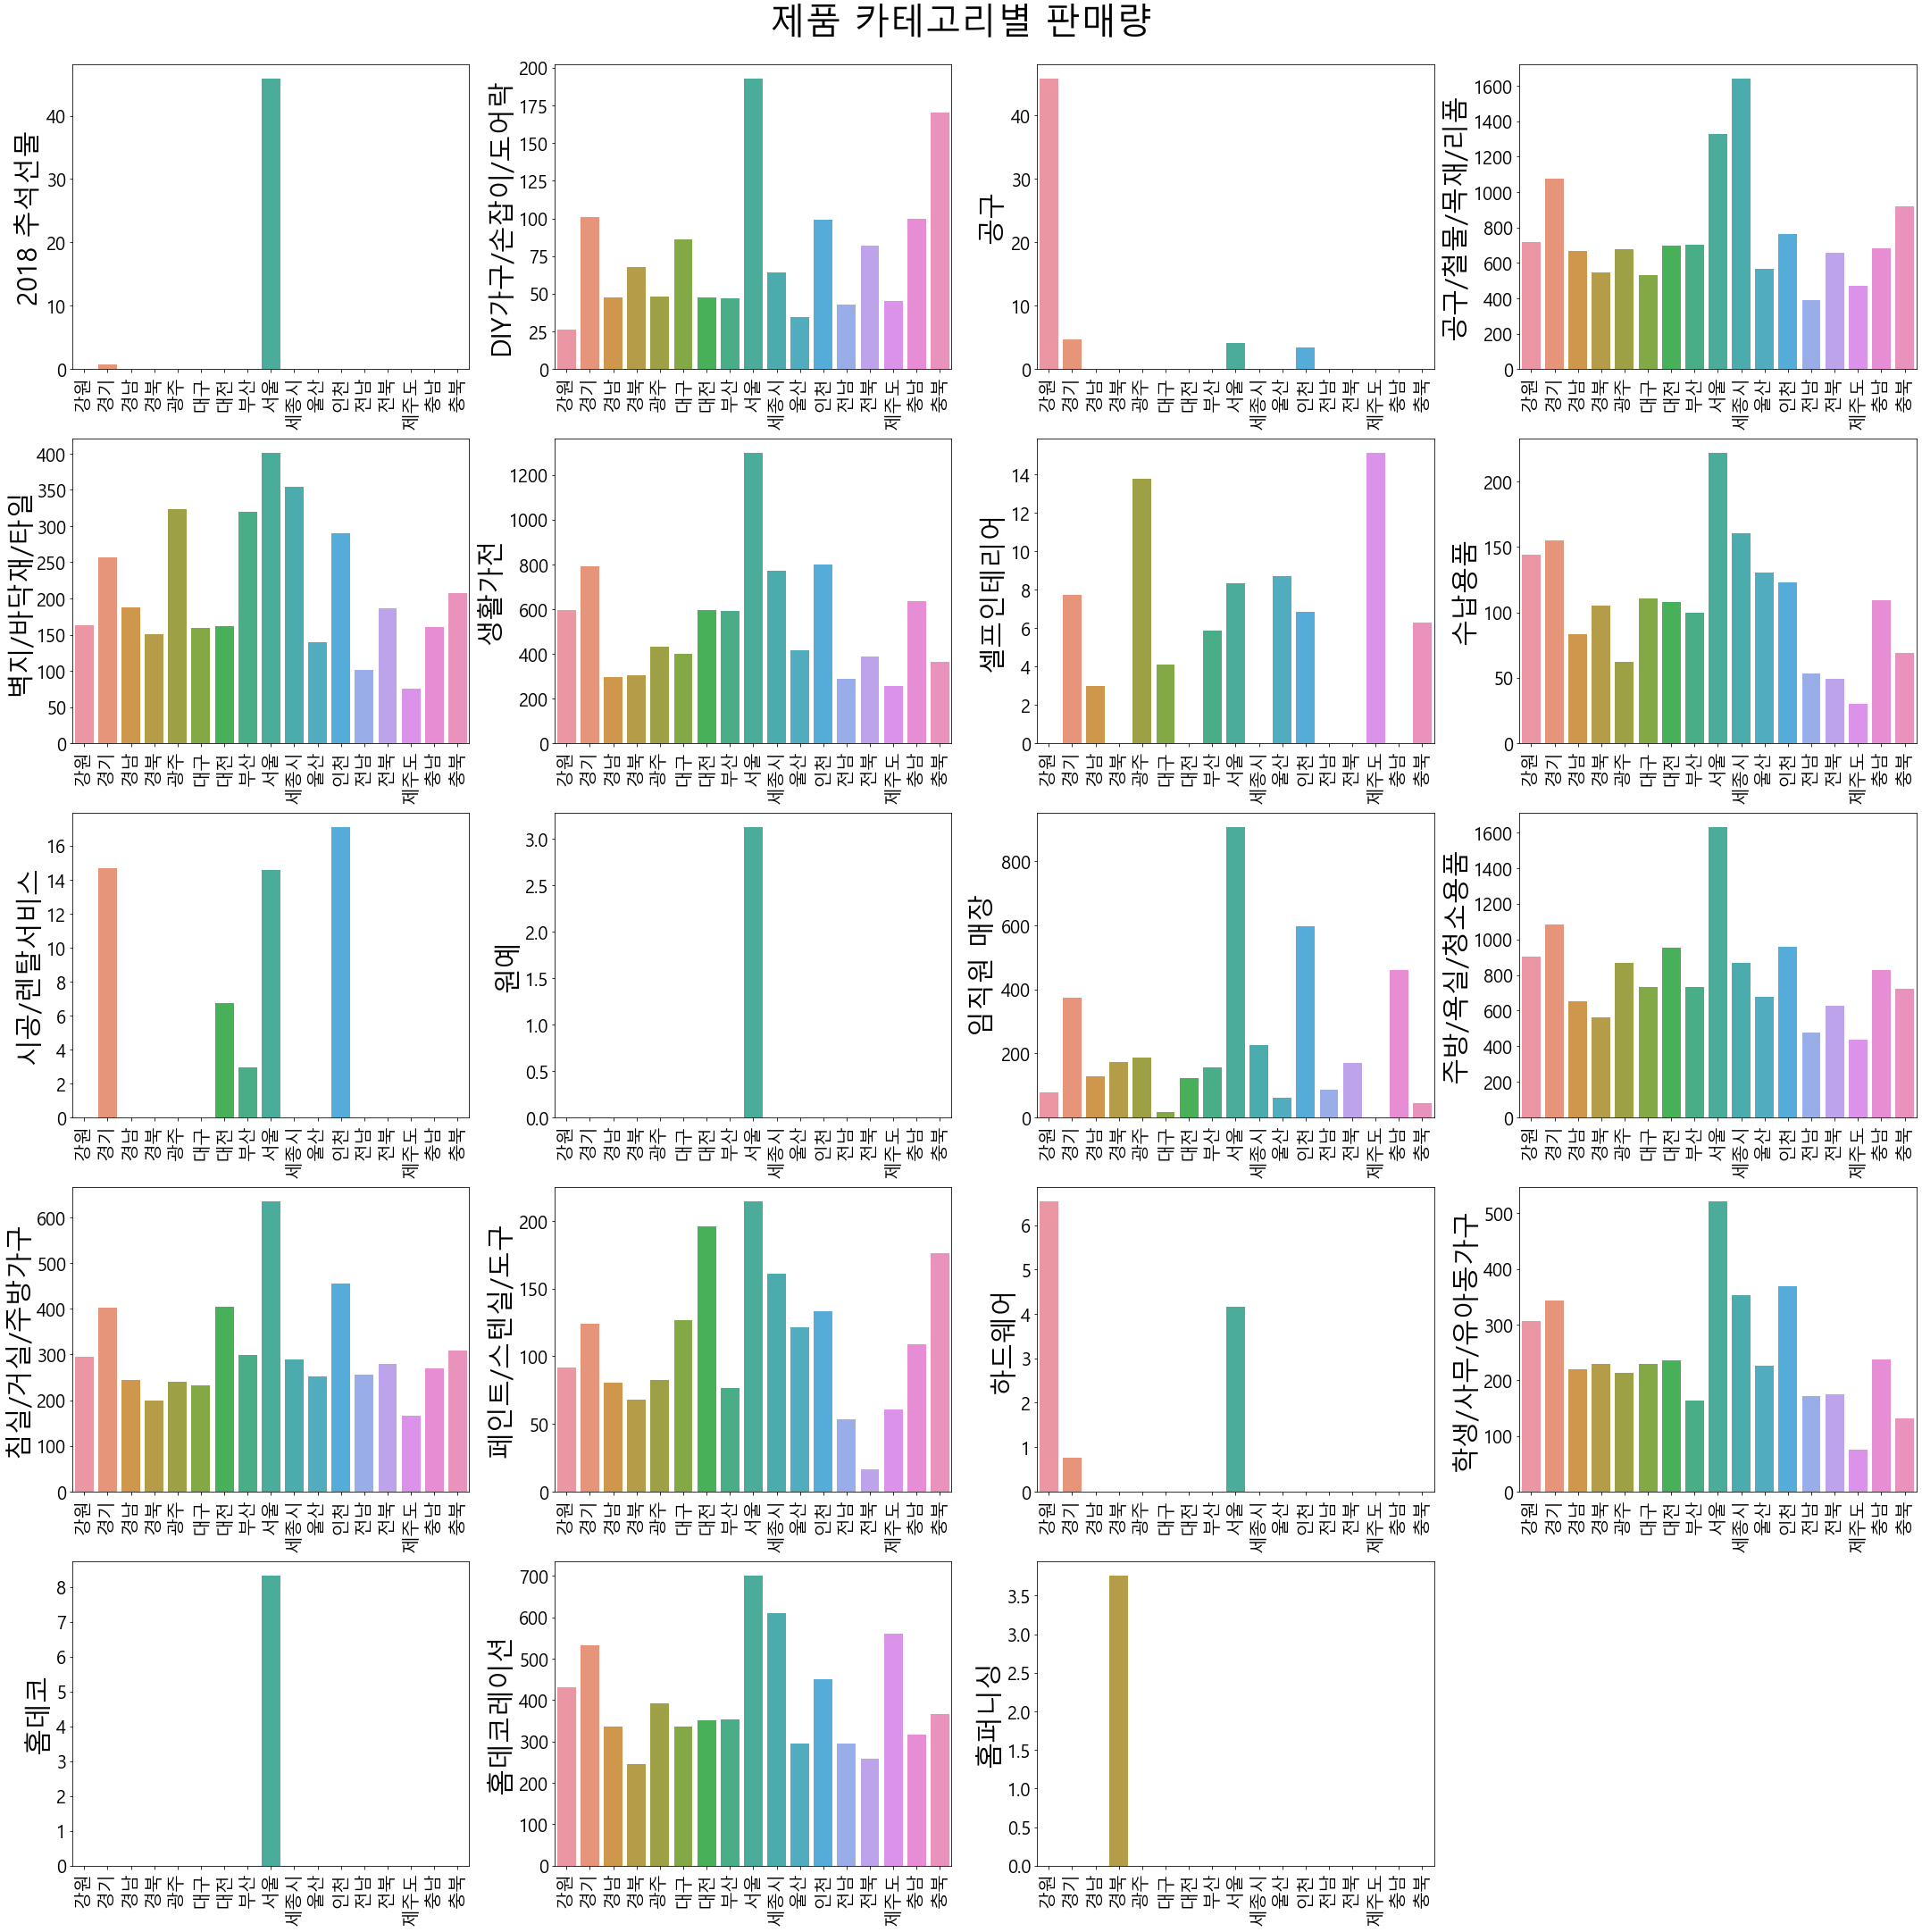

In [190]:
fig=plt.figure(figsize=(30,30))
for i,col in zip(range(1,20),df_regcatvis.columns):
    plt.subplot(5,4,i)
    sns.barplot(data=df_regcatvis,x=df_regcatvis.index,y=df_regcatvis[col],label=col)
    plt.xticks(rotation=90,size=20)
    plt.yticks(size=20)
    plt.xlabel('')
    plt.ylabel(col,size=30)
    
fig.suptitle('제품 카테고리별 판매량',size=40,y=1)
plt.tight_layout()
plt.show()

## 지역별 브랜드, 업체 선호도 분석

In [191]:
df_3loc_2cat.columns

Index(['상품번호', '시도', '카테고리명', '상품명', '브랜드명', '업체명'], dtype='object')

In [192]:
df_3loc_2cat.groupby(['시도','브랜드명'],as_index=False).count() #3393 rows

,시도,브랜드명,상품번호,카테고리명,상품명,업체명
0,강원,101do,1,1,1,1
1,강원,2TEC floor drain,2,2,2,2
2,강원,3M,5,5,5,5
3,강원,4BNK,2,2,2,2
4,강원,A-PORT,6,6,6,6
...,...,...,...,...,...,...
3388,충북,태나전기,2,2,2,2
3389,충북,파워큐브,1,1,1,1
3390,충북,퍼펙죤,1,1,1,1
3391,충북,프라임행거,1,1,1,1


In [193]:
# 시,도별 판매량/시,도별 총인구수*10000000
df_group=df_3loc_2cat.groupby(['시도','브랜드명'],as_index=False).count()
df_group['norm']=[df_group.iloc[i][2]/df_pop_test.loc[df_group.iloc[i][0]][1]*10000000 for i in range(3393)]

In [194]:
df_regcatvis=df_group.pivot(index='시도',columns='브랜드명',values='norm')
df_regcatvis

브랜드명,h'_Kaffee,101do,2TEC floor drain,3M,3PEAKS,4BNK,A-PORT,AFAC,ALENTO,ALLMOM,...,한일메디컬,한일생명과학,한화L&amp;C,해담,햄튼,향기공장,헤이안신도,헨켈,호미,화경산업
시도,,,,,,,,,,,,,,,,,,,,,
강원,NaN,6.536033,13.072066,32.680166,NaN,13.072066,39.216199,NaN,13.072066,NaN,...,6.536033,NaN,39.216199,NaN,NaN,NaN,NaN,NaN,NaN,NaN
경기,NaN,25.488146,1.544736,25.488146,NaN,2.317104,29.349987,0.772368,5.406576,NaN,...,6.951313,0.772368,17.764466,NaN,NaN,NaN,NaN,NaN,0.772368,0.772368
경남,NaN,14.903107,NaN,5.961243,NaN,NaN,11.922486,NaN,NaN,NaN,...,5.961243,NaN,2.980621,NaN,NaN,NaN,NaN,NaN,NaN,NaN
경북,NaN,NaN,NaN,15.039974,NaN,3.759994,37.599936,NaN,11.279981,NaN,...,NaN,NaN,18.799968,NaN,NaN,NaN,NaN,NaN,3.759994,NaN
광주,NaN,20.662182,NaN,61.986545,NaN,NaN,48.211757,NaN,NaN,NaN,...,NaN,NaN,6.887394,NaN,NaN,NaN,NaN,NaN,NaN,NaN
대구,NaN,16.357891,NaN,16.357891,NaN,12.268418,12.268418,4.089473,NaN,NaN,...,NaN,NaN,8.178946,NaN,NaN,NaN,NaN,NaN,NaN,NaN
대전,NaN,27.008906,NaN,6.752226,NaN,NaN,20.256679,NaN,NaN,NaN,...,6.752226,NaN,13.504453,NaN,NaN,NaN,6.752226,NaN,6.752226,NaN
부산,NaN,17.610744,NaN,2.935124,NaN,2.935124,17.610744,NaN,5.870248,NaN,...,2.935124,NaN,11.740496,NaN,NaN,NaN,NaN,NaN,2.935124,NaN
서울,3.123142,26.026181,3.123142,23.944087,NaN,10.410472,33.313512,NaN,6.246283,1.041047,...,17.697803,NaN,18.738850,1.041047,1.041047,NaN,1.041047,1.041047,4.164189,NaN


### 판매량 top20 브랜드의 지역별 판매량
- 세종시에서 인기있는 브랜드는 오르다(인테리어),WALLPLAN(벽지), 줄눈닷컴(사업자전용 공구,인테리어)

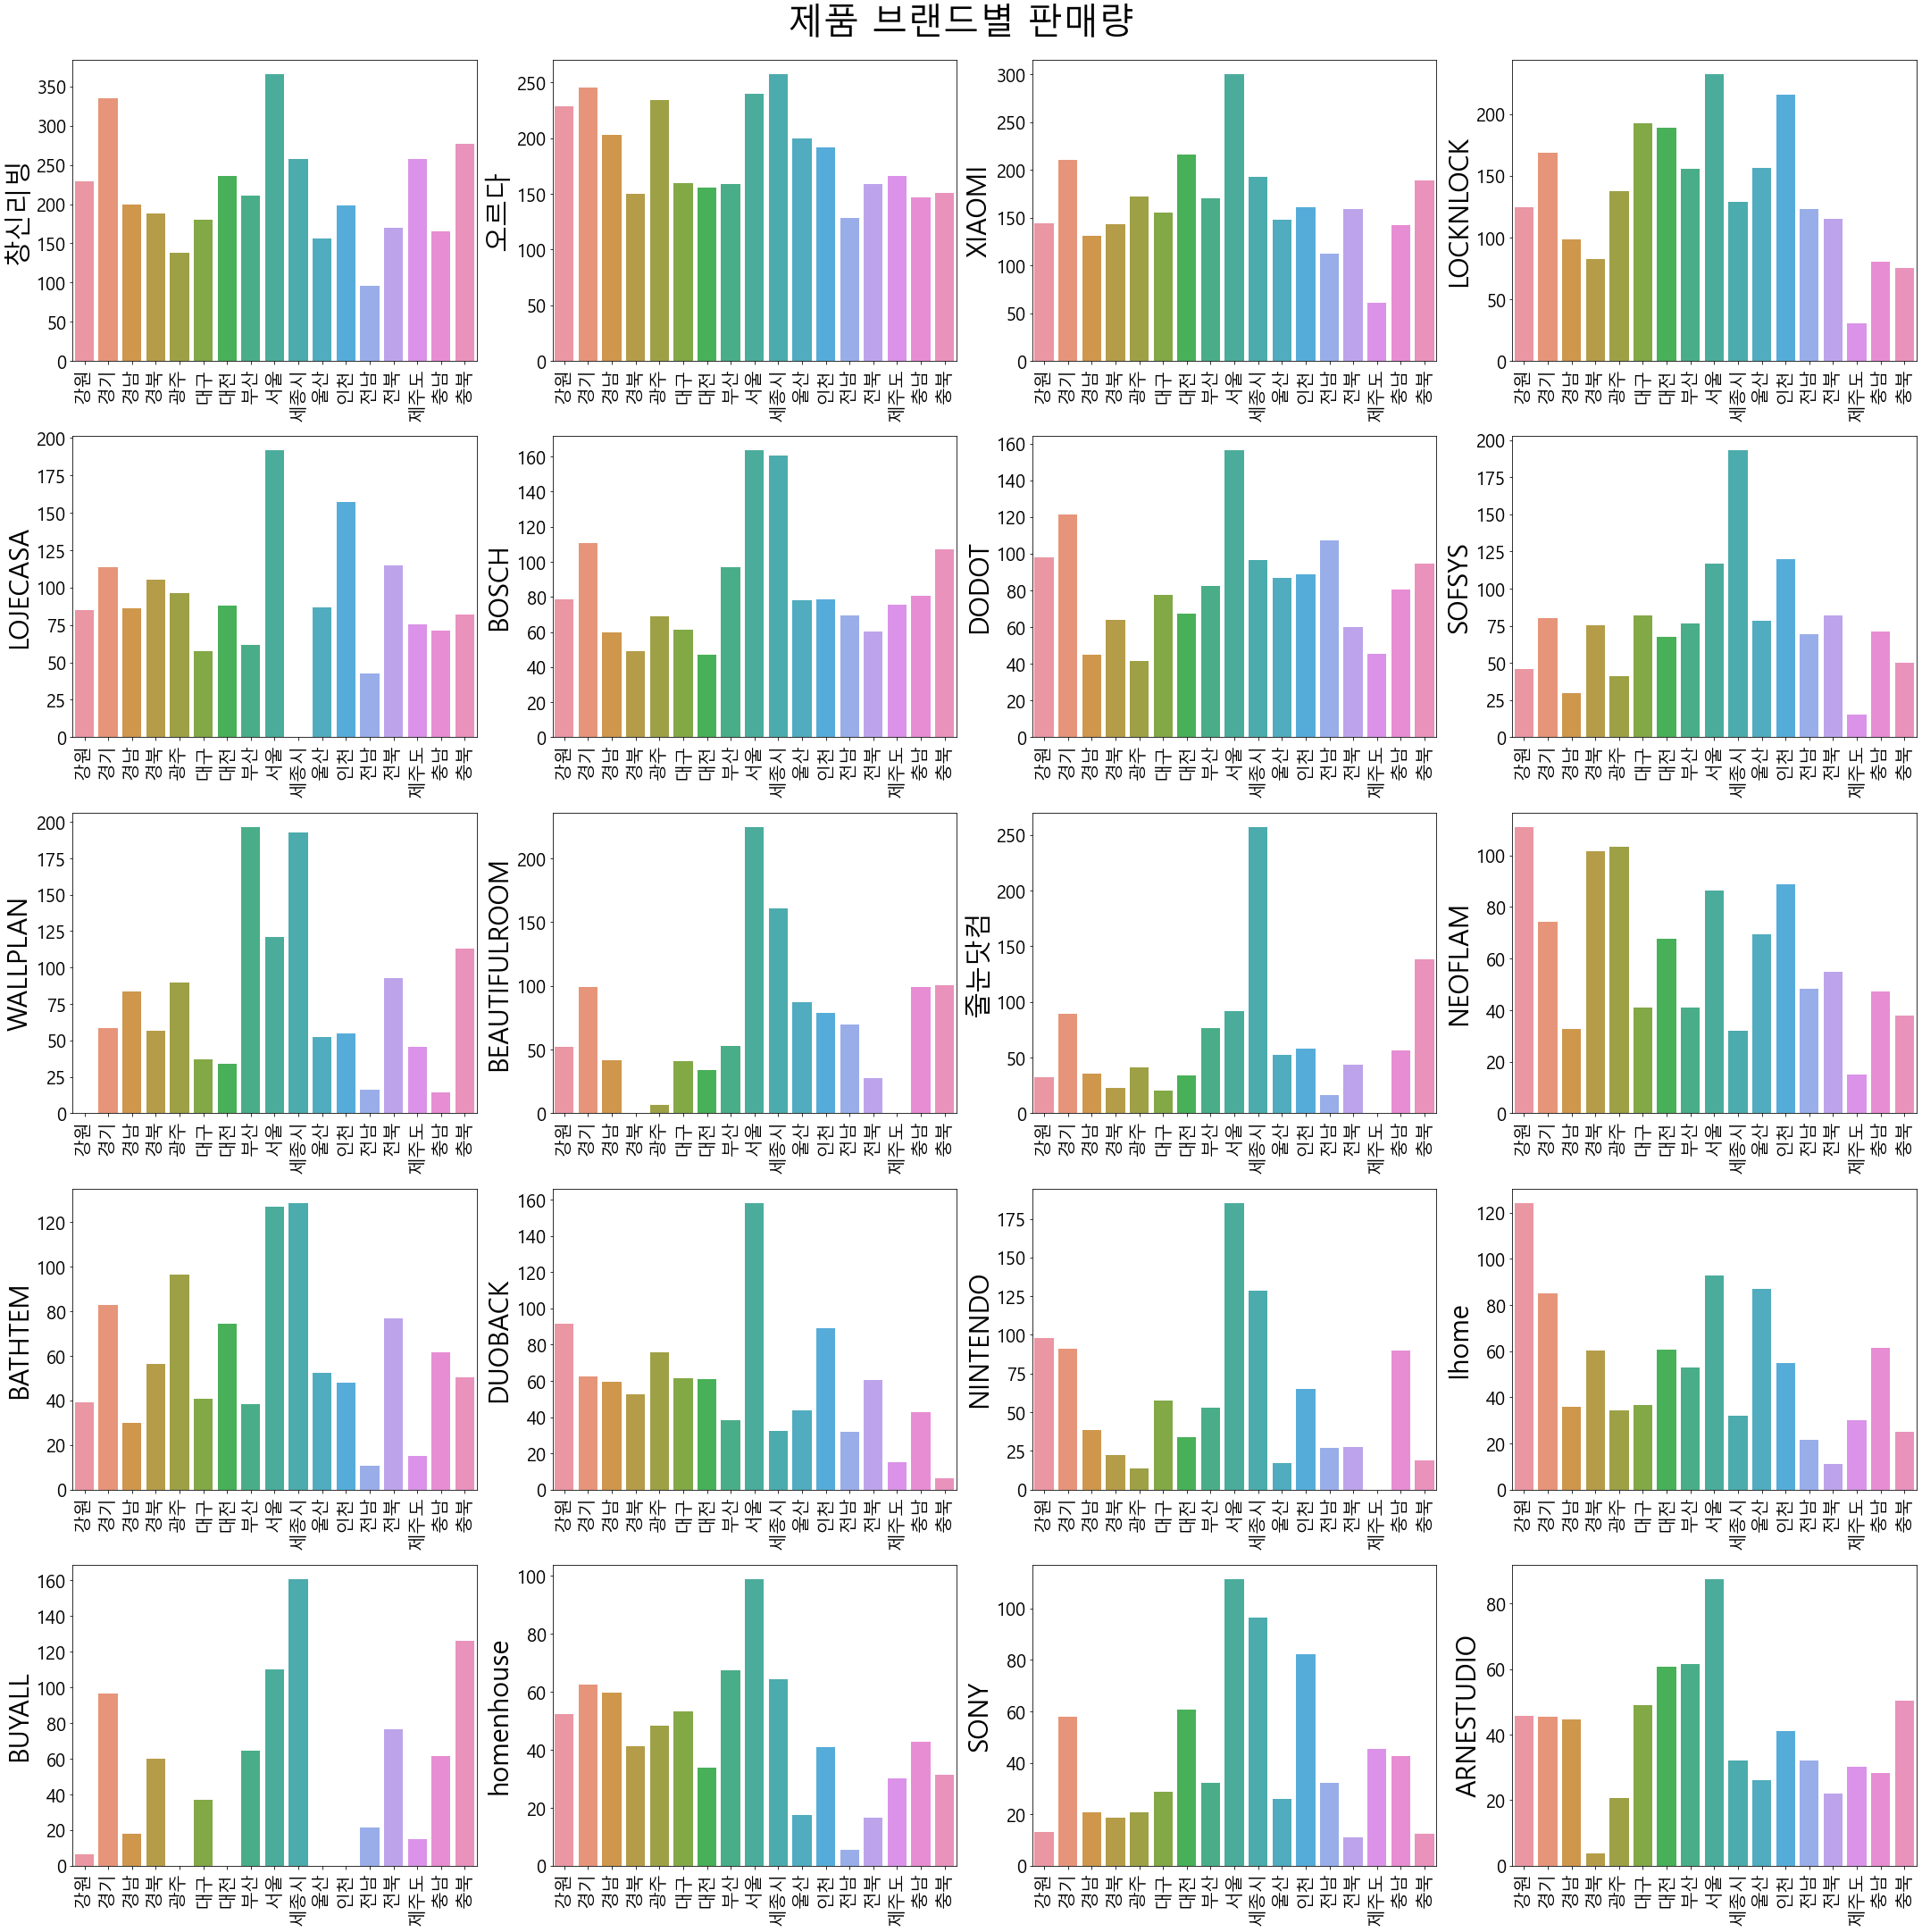

In [195]:
fig=plt.figure(figsize=(30,30))
for i,col in zip(range(1,21),df_regcatvis.sum().sort_values(ascending=False).head(20).index):
    plt.subplot(5,4,i)
    sns.barplot(data=df_regcatvis,x=df_regcatvis.index,y=df_regcatvis[col],label=col)
    plt.xticks(rotation=90,size=20)
    plt.yticks(size=20)
    plt.xlabel('')
    plt.ylabel(col,size=30)
    
fig.suptitle('제품 브랜드별 판매량',size=40,y=1)
plt.tight_layout()
plt.show()
#bosch는 전동공구 브랜드

In [196]:
df_3loc_2cat.groupby(['시도','업체명'],as_index=False).count() #2210 rows

,시도,업체명,상품번호,카테고리명,상품명,브랜드명
0,강원,(주) 데코정보,3,3,3,3
1,강원,(주)거목,2,2,2,2
2,강원,(주)굿센스,10,10,10,10
3,강원,(주)듀오백,14,14,14,14
4,강원,(주)디엠케이코리아,3,3,3,3
...,...,...,...,...,...,...
2205,충북,핸즈홈,3,3,3,3
2206,충북,현민무역 주식회사,1,1,1,1
2207,충북,홈앤톤즈,1,1,1,1
2208,충북,홈앤하우스,5,5,5,5


In [197]:
# 시,도별 판매량/시,도별 총인구수*10000000
df_group=df_3loc_2cat.groupby(['시도','업체명'],as_index=False).count()
df_group['norm']=[df_group.iloc[i][2]/df_pop_test.loc[df_group.iloc[i][0]][1]*10000000 for i in range(2210)]

In [198]:
df_regcatvis=df_group.pivot(index='시도',columns='업체명',values='norm')
df_regcatvis

업체명,(주) 데코정보,(주)거목,(주)굿센스,(주)금오디앤아이지점,(주)나라코퍼레이션,(주)나래비앤씨,(주)네모상자,(주)누리마루,(주)더블유타노시,(주)더정직한친구들,...,한산피엔지,한일카페트,한화엘앤씨 주식회사,핸즈홈,현민무역 주식회사,홈앤톤즈,홈앤하우스,화이트리퍼블릭 주식회사,흙사랑다모아,힘펠
시도,,,,,,,,,,,,,,,,,,,,,
강원,19.608099,13.072066,65.360332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6.536033,6.536033,52.288265,NaN,NaN,6.536033
경기,25.488146,23.943410,42.480244,NaN,3.861840,6.951313,NaN,NaN,NaN,11.585521,...,10.813153,1.544736,0.772368,6.951313,27.805250,16.992098,63.334182,3.089472,0.772368,4.634208
경남,20.864350,11.922486,62.593051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,29.806215,NaN,NaN,NaN,8.941864,17.883729,59.612430,NaN,NaN,11.922486
경북,22.559962,11.279981,7.519987,NaN,NaN,NaN,NaN,NaN,NaN,15.039974,...,NaN,3.759994,NaN,NaN,11.279981,3.759994,41.359930,NaN,NaN,NaN
광주,27.549575,NaN,41.324363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,34.436969,20.662182,27.549575,48.211757,NaN,NaN,NaN
대구,16.357891,20.447364,94.057873,NaN,4.089473,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12.268418,12.268418,61.342091,NaN,NaN,8.178946
대전,13.504453,13.504453,54.017811,NaN,NaN,6.752226,NaN,NaN,NaN,NaN,...,NaN,NaN,6.752226,NaN,27.008906,81.026717,33.761132,NaN,NaN,NaN
부산,41.091737,5.870248,46.961985,NaN,NaN,2.935124,NaN,2.935124,NaN,5.870248,...,NaN,NaN,2.935124,8.805372,20.545869,5.870248,67.507854,NaN,NaN,NaN
서울,36.436654,30.190370,72.873307,1.041047,5.205236,5.205236,1.041047,NaN,1.041047,39.559795,...,31.231417,2.082094,1.041047,4.164189,44.765031,30.190370,103.063677,9.369425,NaN,8.328378


### 판매량 top20 업체의 지역별 판매량
- 세종시에서 인기있는 업체는 하우스플러스(디지털도어록전문유통), 월플랜(벽지,바닥재,페인트,시트), 등

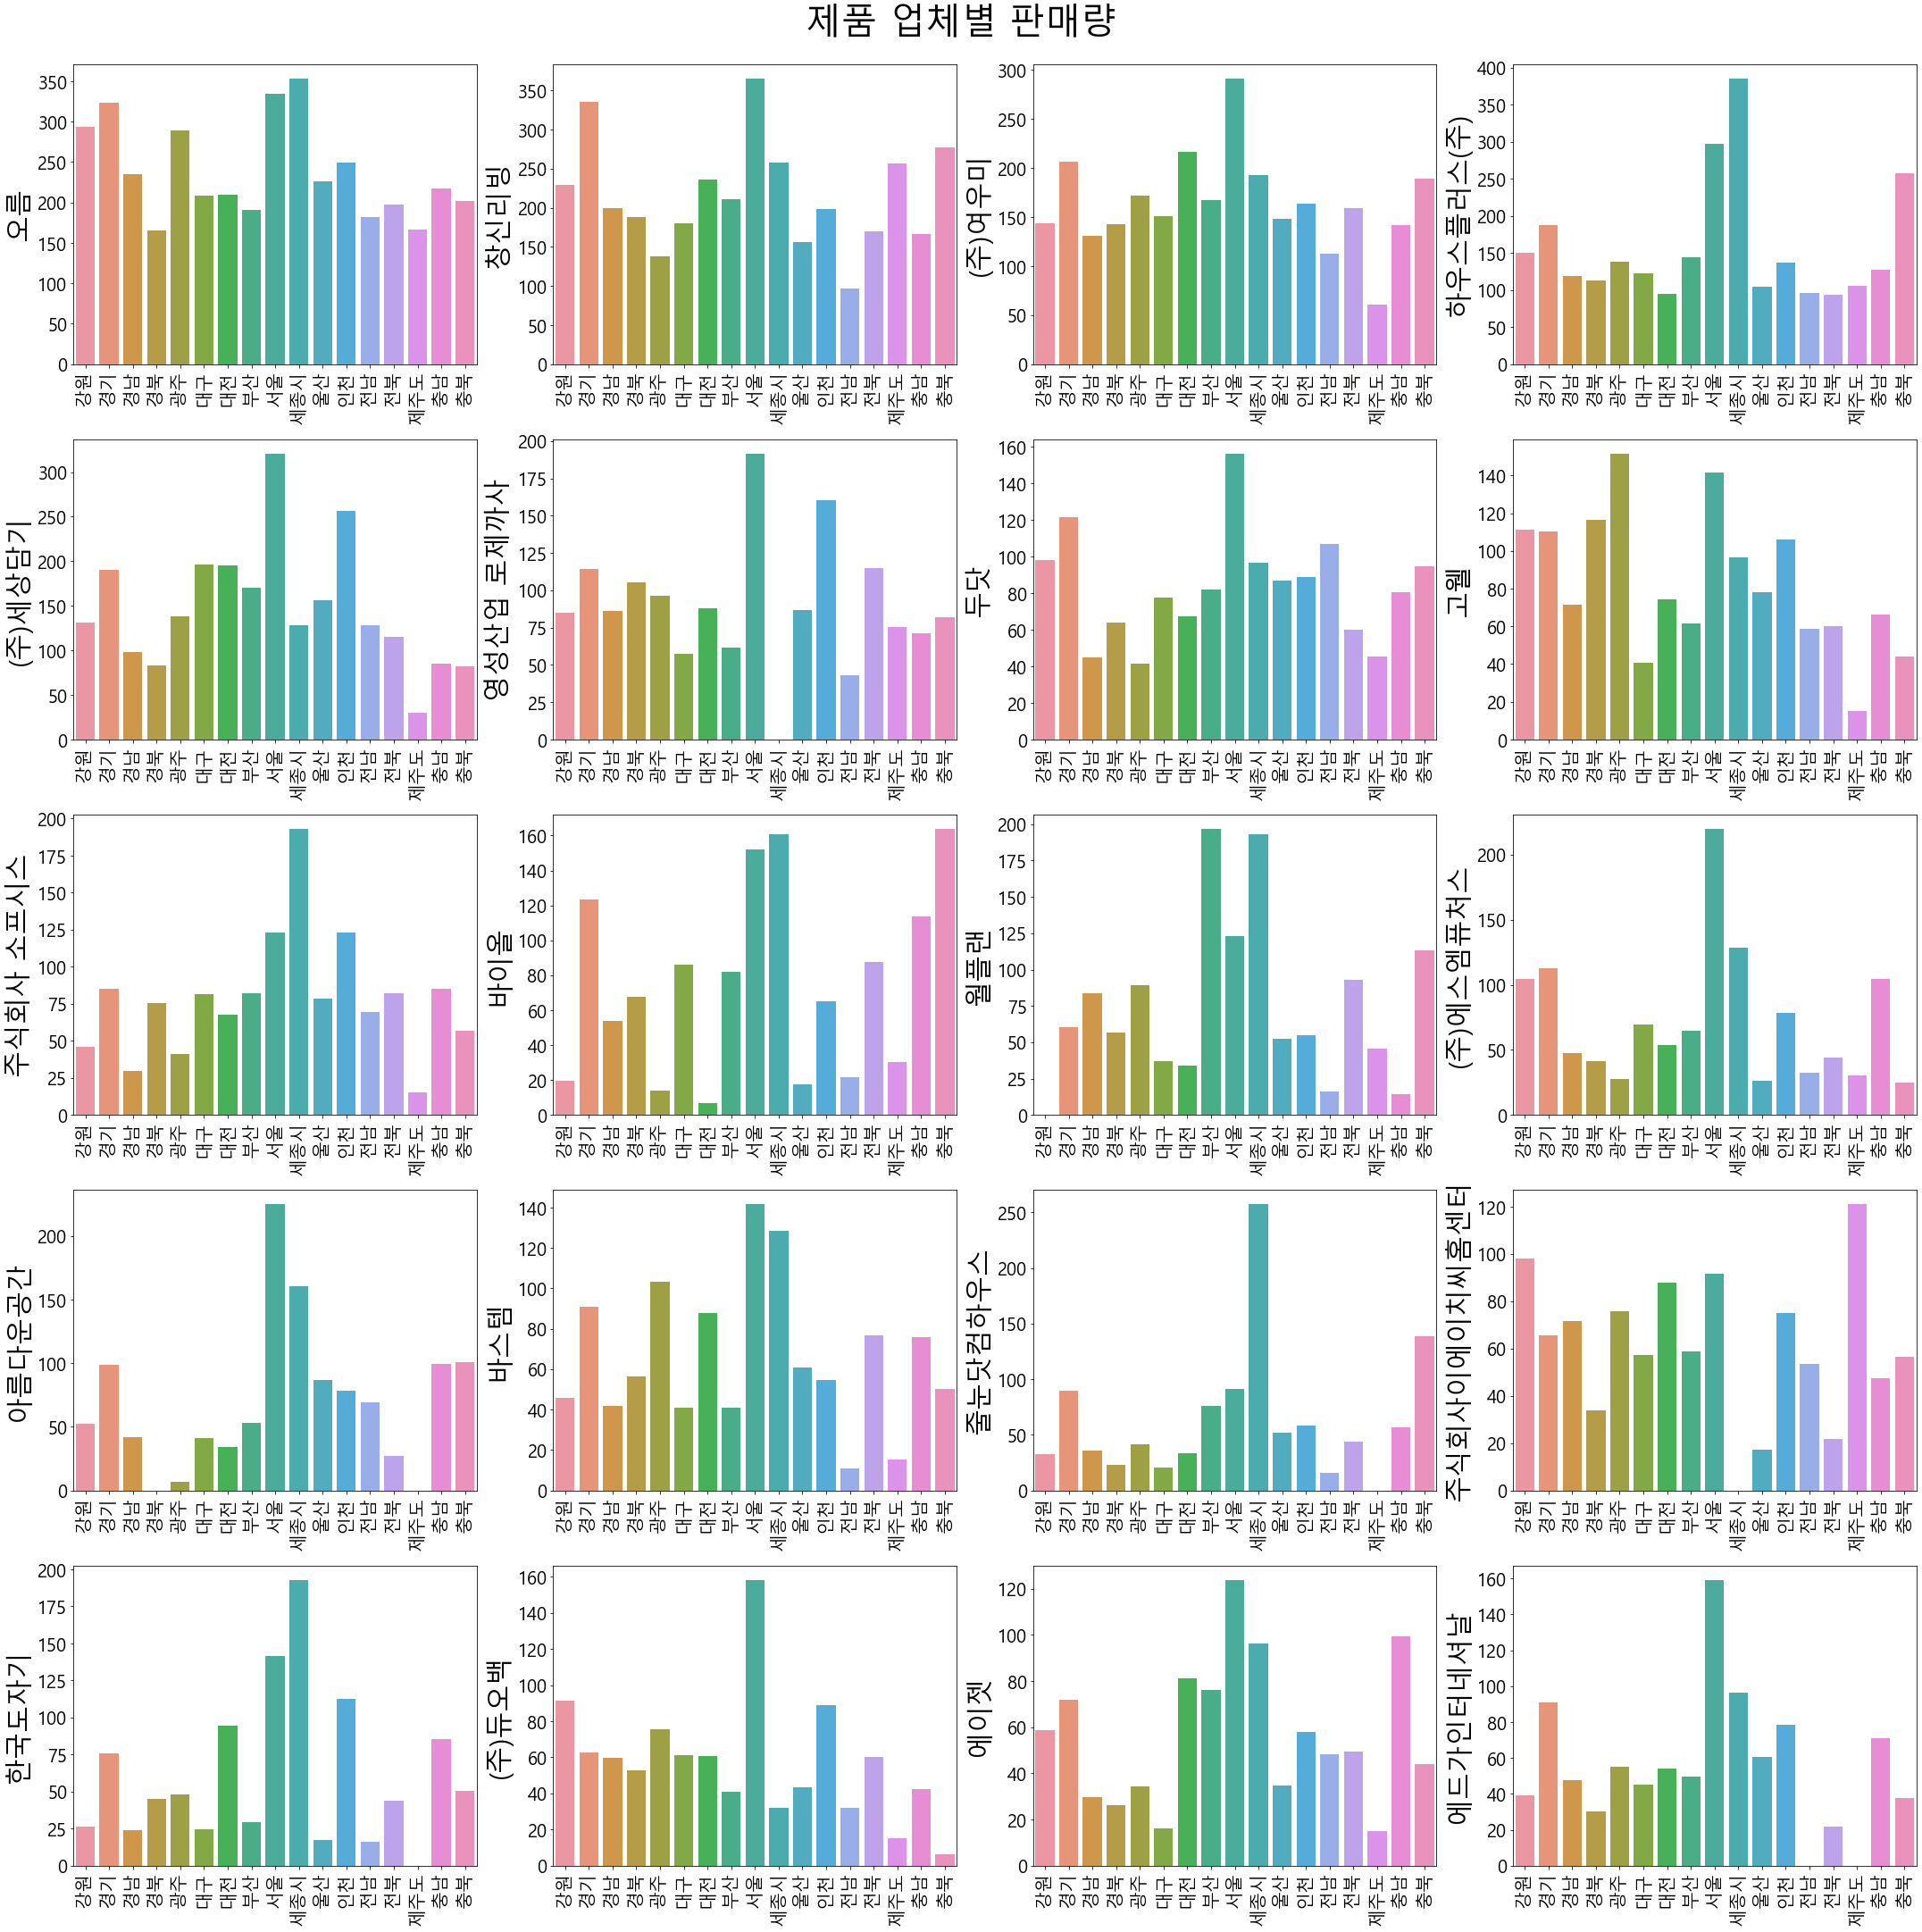

In [199]:
fig=plt.figure(figsize=(30,30))
for i,col in zip(range(1,21),df_regcatvis.sum().sort_values(ascending=False).head(20).index):
    plt.subplot(5,4,i)
    sns.barplot(data=df_regcatvis,x=df_regcatvis.index,y=df_regcatvis[col],label=col)
    plt.xticks(rotation=90,size=20)
    plt.yticks(size=20)
    plt.xlabel('')
    plt.ylabel(col,size=30)
    
fig.suptitle('제품 업체별 판매량',size=40,y=1)
plt.tight_layout()
plt.show()